

# Diamond Price Prediction
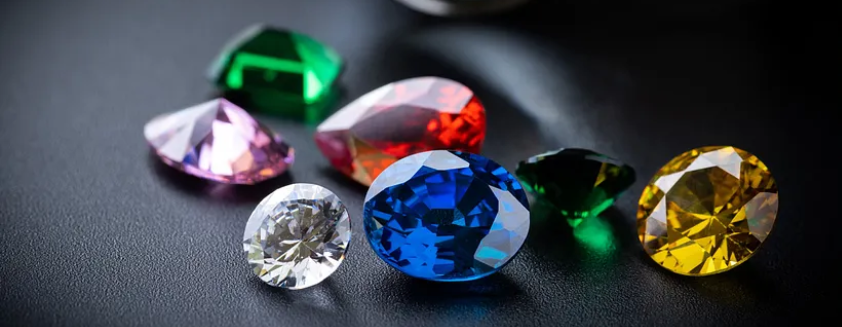
## Phase 1: Data Preparation & Visualisation

#### Group Name:

#### Name(s) & ID(s) of Group Members:

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Literature Review](#Literature-Review)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

### Dataset Source <a id='Dataset-Source'></a>:

The study utilized the Gemstone Prices dataset from Kaggle (2017), sourced from Tiffany & Co's 2017 price list.  Originally containing information on 53,940 diamonds, we narrowed our focus to 1,700 diamonds for analysis, with 700 having '11' clarity and 1,000 having 'VS1' clarity.


### Dataset Details <a id='Dataset-Details'></a>:

The dataset aims to predict the price of diamonds through regression analysis. It includes 10 independent variables, such as carat, cut quality, color, clarity, depth, table, and dimensions (x, y, z), along with a unique identifier (id). The target variable is the price of the diamond.

### Dataset Features <a id='Dataset-Features'></a>:

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension




### Target Feature <a id='Target-Feature'></a>:


Target variable:
* `price`: Price of the given Diamond.



**Dataset Retrieval**

- We read in the dataset from our GitHub repository and load the modules we will use throughout this report.
- We display 10 randomly sampled rows from this dataset.

In [181]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [182]:
# name of the dataset to be imported from our GitHub account
df_name = 'gemstone.csv'

In [183]:
## Data Ingestions step
df_url = 'https://raw.githubusercontent.com/MasteriNeuron/Diamond_Price/main/notebooks/data/' + df_name
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [184]:
df.sample(10, random_state=999)

id  carat        cut color clarity  depth  table     x     y  \
184046  184046   1.05      Ideal     E     SI1   61.4   55.0  6.59  6.56   
49070    49070   1.50       Good     J     VS1   60.1   60.0  7.30  7.36   
143111  143111   0.54  Very Good     F    VVS2   62.8   54.0  5.22  5.25   
89111    89111   0.33      Ideal     F    VVS2   61.7   55.0  4.48  4.47   
136184  136184   0.90    Premium     I     SI1   62.5   58.0  6.13  6.06   
180149  180149   1.01       Good     D     SI2   63.6   57.0  6.37  6.35   
156527  156527   1.01      Ideal     F     VS1   62.0   56.0  6.43  6.41   
123860  123860   0.34    Premium     I    VVS2   60.1   59.0  4.52  4.55   
100985  100985   2.14    Premium     J     SI2   61.6   58.0  8.35  8.29   
127124  127124   2.01      Ideal     I     SI1   60.5   57.0  8.08  8.13   

           z  price  
184046  4.04   6937  
49070   4.41   8359  
143111  3.29   2362  
89111   2.76   1041  
136184  3.81   3220  
180149  4.04   4956  
156527  3.98   7862  
123860  2.73    596  
100985  5.14  12970  
127124  4.91  17143

### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [185]:
from tabulate import tabulate

table = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['id', 'Nominal Categorical', '-', 'Unique identifier of each diamond'],
    ['carat', 'Numeric', 'ct.', 'Weight of the diamond (0.2--5.01)'],
    ['cut', 'Nominal Categorical', '-', 'Quality of the cut (Fair, Good, Very Good, Premium, Ideal)'],
    ['color', 'Nominal Categorical', '-', 'Diamond colour, from J (worst) to D (best)'],
    ['clarity', 'Nominal Categorical', '-', 'Measurement of how clear the diamond is\n (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))'],
    ['depth', 'Numeric', 'mm', 'Height of diamond from culet to table (43--79)'],
    ['table', 'Numeric', '-', "Width of top of diamond relative to widest point (43--95)"],
    ['x', 'Numeric', 'mm', 'Length in mm (0--10.74)'],
    ['y', 'Numeric', 'mm', 'Width in mm (0--58.9)'],
    ['z', 'Numeric', 'mm', 'Depth in mm (0--31.8)'],
    ['price', 'Numeric', 'USD', 'Price in US dollars ($326--$18,823)']
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════╤═════════════════════╤═════════╤════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units   │ Description                                                │
╞═════════╪═════════════════════╪═════════╪════════════════════════════════════════════════════════════╡
│ id      │ Nominal Categorical │ -       │ Unique identifier of each diamond                          │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ carat   │ Numeric             │ ct.     │ Weight of the diamond (0.2--5.01)                          │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ cut     │ Nominal Categorical │ -       │ Quality of the cut (Fair, Good, Very Good, Premium, Ideal) │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ color   │ Nominal Categorical │ -       │ Diamond col

### Target Feature

The target feature "price" represents the price of diamonds in US dollars and is a numeric variable ranging from dollor 326 to dollor 18,823.

## Goals and Objectives <a id='Goals-and-Objectives'></a>:

The purpose of the analysis is to build a predictive model that can effectively predict the cost of diamonds depending on a number of features, including carat weight, cut quality, color, clarity, and various dimensions . Through the use of regression analysis, the goal is to identify how these parameters are correlated to diamond prices, thus enabling the users to benefit from relevant pricing approaches and market trends. As such, the model can help customers identify real prices for diamonds and aid professionals in the field of the factors that define them. In addition, the approach can also help determine the driving features behind diamond pricing, thus locating patterns that can help to build more effective pricing strategies in the industry and make professionals more competitive.

Hence, the main ultimate goal of this project includes two targets: to predict the price of diamonds using various features of diamonds such as carat, cut, color, clarity, and dimensions with the help of regression analysis as diamond prices typically range vary widely and to describe which features play a significant role in assessing the price. Meanwhile, a secondary goal is to conduct exploratory data analysis with basic descriptive statistics and visualization by using such tools as different charts and infographics. This is intended to reveal the puzzling interaction of the data that is left after data cleaning and pre-processing. It is noteworthy that for now, we consider that our rows are independent of each other.

## Data Cleaning and Preprocessing <a id='Data-Cleaning-and-Preprocessing'></a>:

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

Let's first display all the columns in our dataset.

In [186]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

'id' is irrelivant feature,thus it is considered as redundant and removed. 

In [187]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

carat        cut color clarity  depth  table     x     y     z  price
0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

### Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [188]:
# Check for data types
print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (193573, 10) 

Data types are below where 'object' indicates a string type: 
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


### Let's see the Categorical Features

In [189]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
df.describe(include='object').T

count unique    top   freq
cut      193573      5  Ideal  92454
color    193573      7      G  44391
clarity  193573      8    SI1  53272

In [190]:
# To see all unique values for categorical data types
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for cut
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']

Unique values for color
['F' 'J' 'G' 'E' 'D' 'H' 'I']

Unique values for clarity
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']



### Let's see the Numerical Features

In [191]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

count         mean          std    min     25%      50%      75%  \
carat  193573.0     0.790688     0.462688    0.2    0.40     0.70     1.03   
depth  193573.0    61.820574     1.081704   52.1   61.30    61.90    62.40   
table  193573.0    57.227675     1.918844   49.0   56.00    57.00    58.00   
x      193573.0     5.715312     1.109422    0.0    4.70     5.70     6.51   
y      193573.0     5.720094     1.102333    0.0    4.71     5.72     6.51   
z      193573.0     3.534246     0.688922    0.0    2.90     3.53     4.03   
price  193573.0  3969.155414  4034.374138  326.0  951.00  2401.00  5408.00   

            max  
carat      3.50  
depth     71.60  
table     79.00  
x          9.65  
y         10.01  
z         31.30  
price  18818.00

The summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data. 

### Check for Missing value

In [192]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
df.isnull().sum()


Number of missing values for each column/ feature:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values present in the dataset

## check for duplicated records

In [193]:
df.duplicated().sum()

0

No any Duplicate column is present.

### Random Sampling

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 6196 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [194]:
df = df.sample(n=5000, random_state=999)
df.shape
df.sample(5, random_state=999)

carat      cut color clarity  depth  table     x     y     z  price
184829   1.00     Good     D     SI2   61.8   62.0  6.38  6.45  3.96   5313
116432   0.36    Ideal     G     SI1   61.6   56.0  4.60  4.56  2.82    689
58038    0.73  Premium     D     SI2   62.5   58.0  5.76  5.69  3.58   2691
26536    0.72    Ideal     F     VS1   61.8   56.0  5.76  5.79  3.57   2913
41978    1.50    Ideal     G     SI1   61.7   57.0  7.37  7.34  4.53  10374

## segregate numerical and categorical columns for next task:

In [195]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [196]:
df[categorical_columns].describe()

cut color clarity
count    5000  5000    5000
unique      5     7       8
top     Ideal     G     SI1
freq     2388  1116    1380

In [197]:
df['cut'].value_counts()

cut
Ideal        2388
Premium      1262
Very Good     984
Good          307
Fair           59
Name: count, dtype: int64

In [198]:
df['color'].value_counts()

color
G    1116
E     950
F     874
H     814
D     637
I     454
J     155
Name: count, dtype: int64

In [199]:
df['clarity'].value_counts()

clarity
SI1     1380
VS2     1170
SI2      835
VS1      822
VVS2     396
VVS1     286
IF        98
I1        13
Name: count, dtype: int64

## Data Exploration and Visualisation<a id='Data-Exploration-and-Visualisation'></a>: 

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation


### Bar Charts & Histograms  of all the Numerical Columns('carat', 'depth', 'table', 'x', 'y', 'z', 'price')

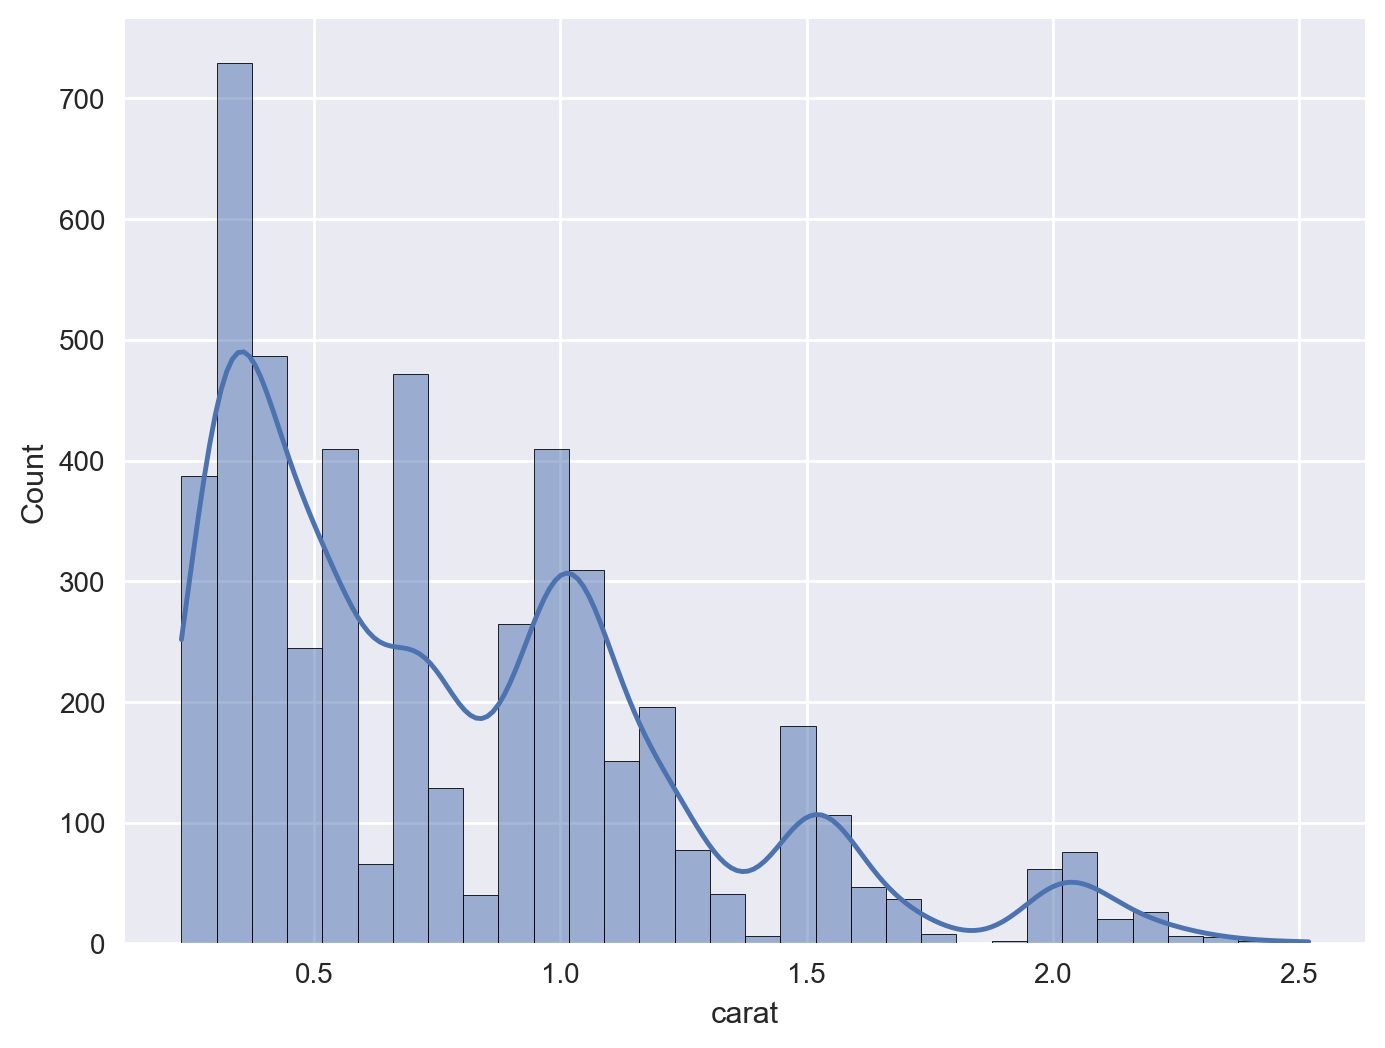

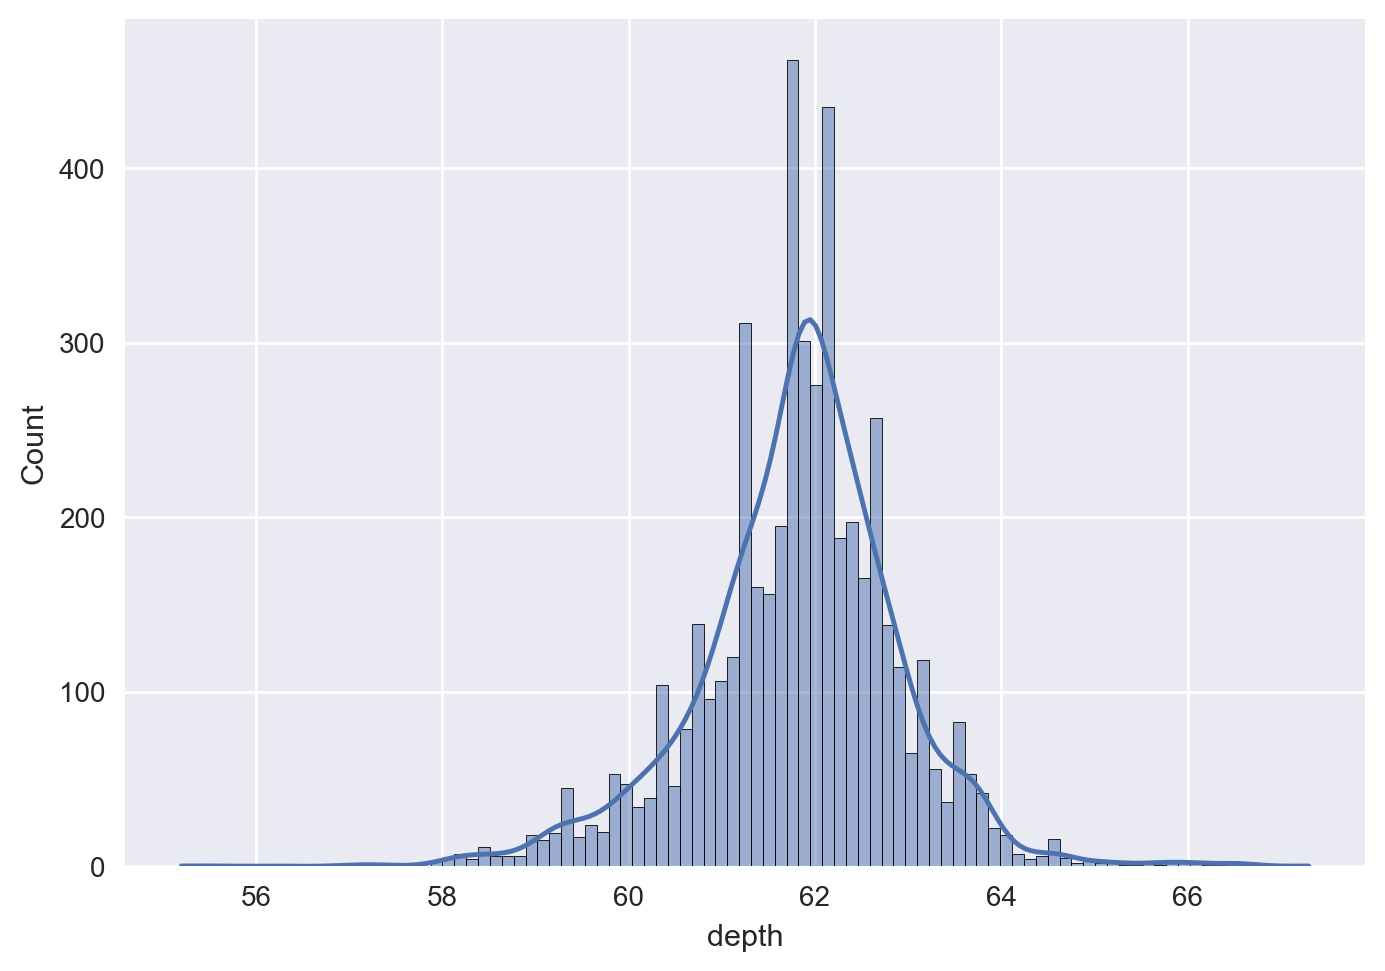

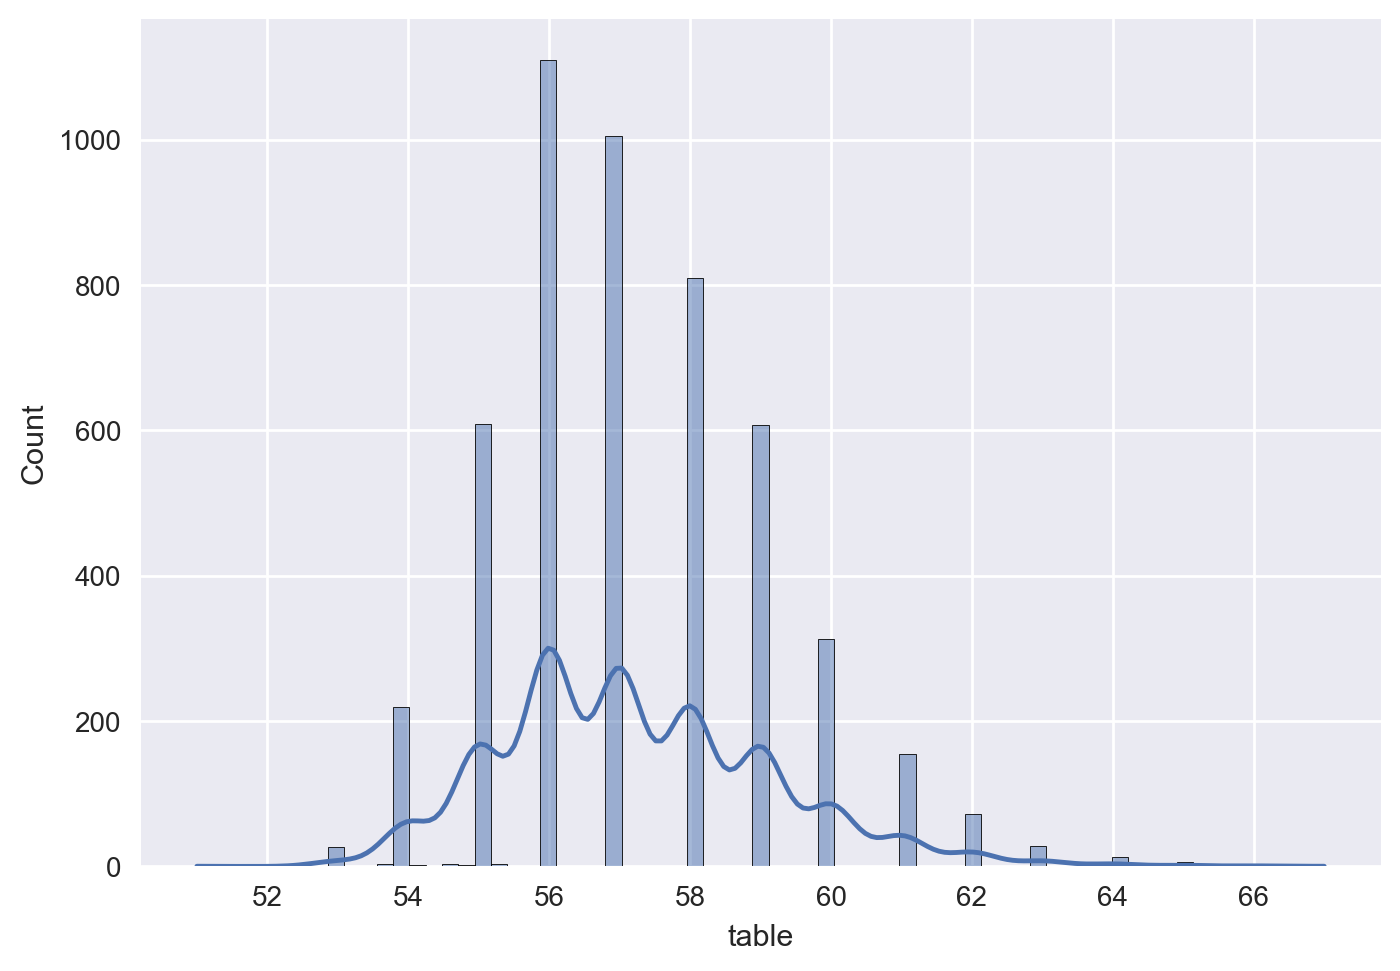

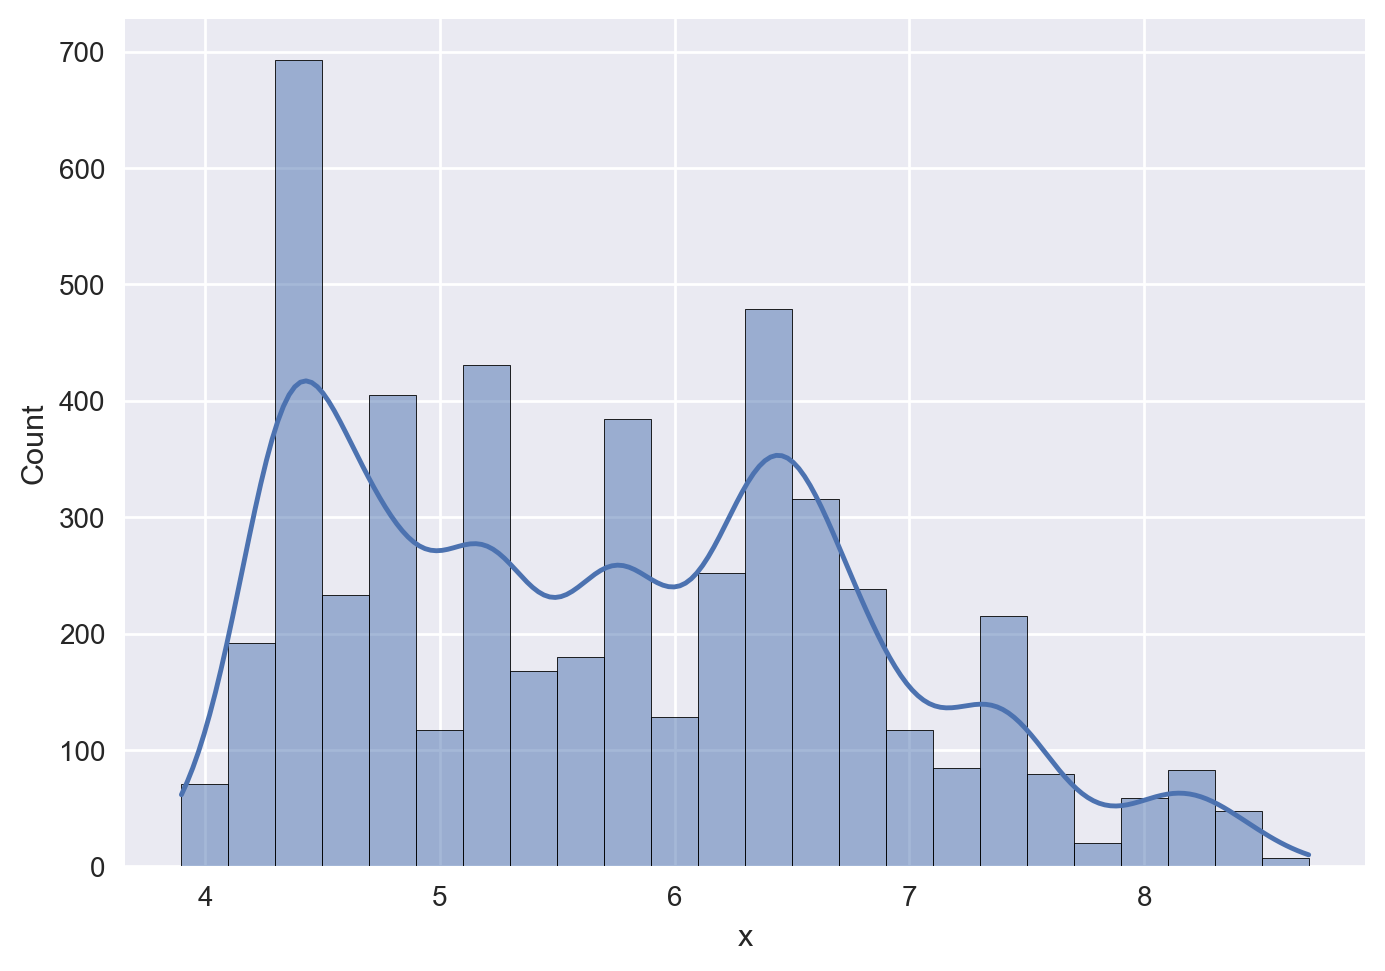

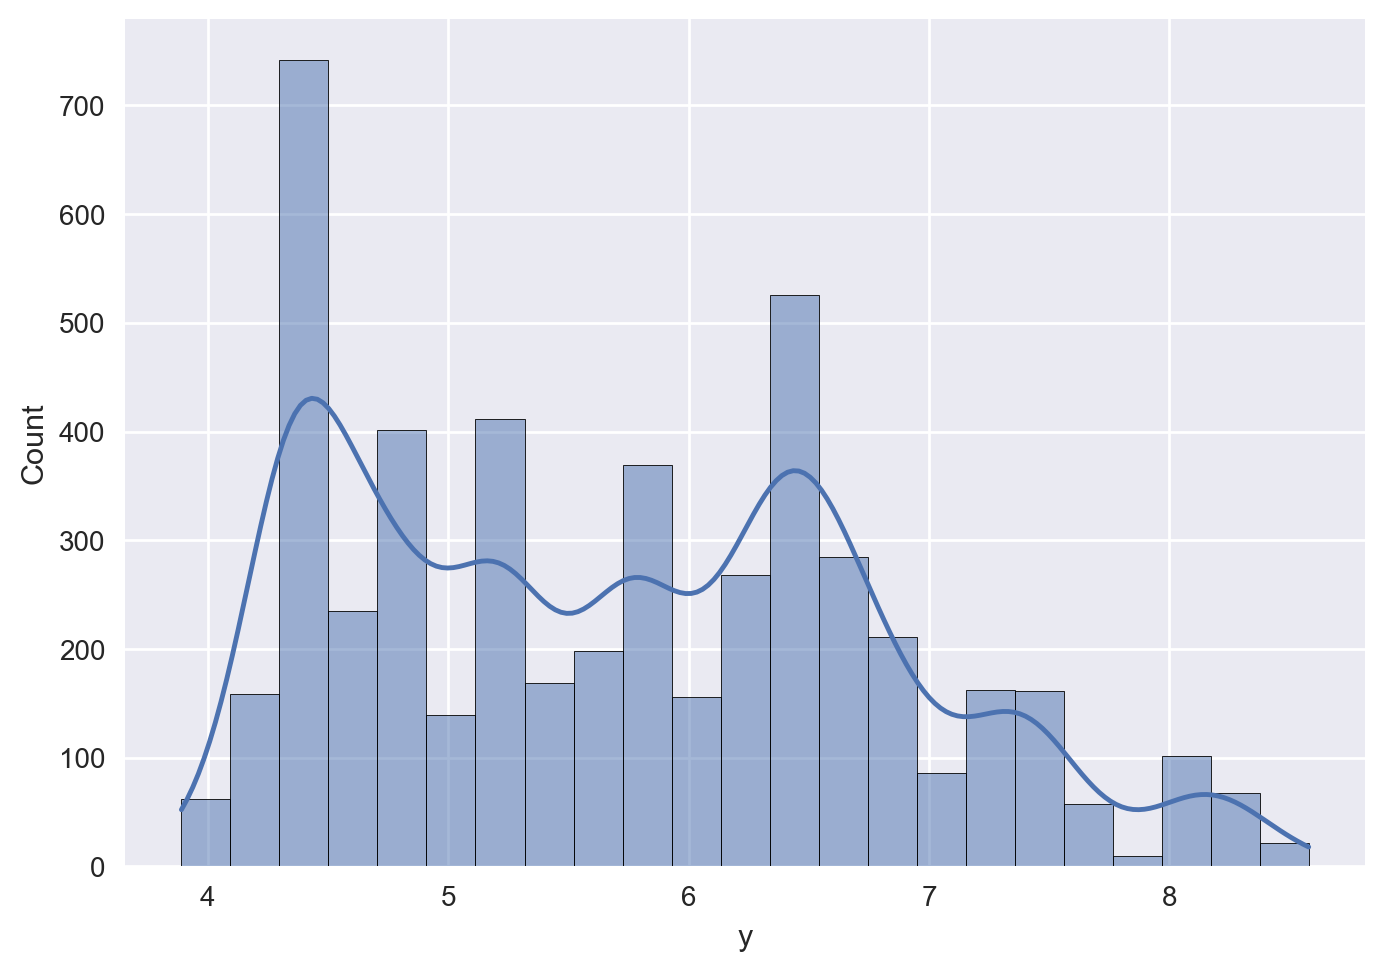

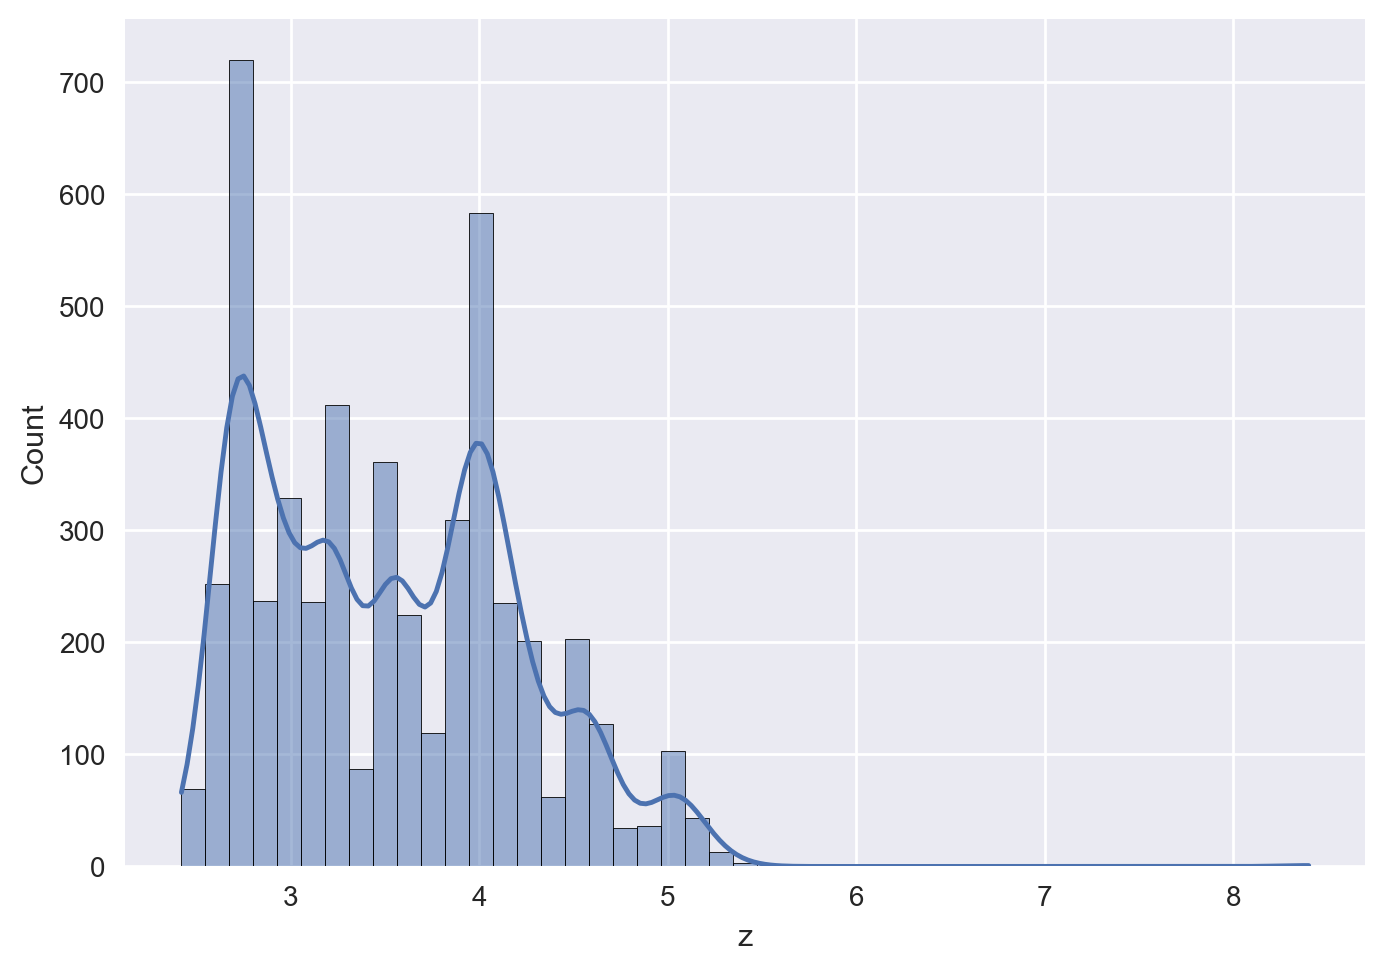

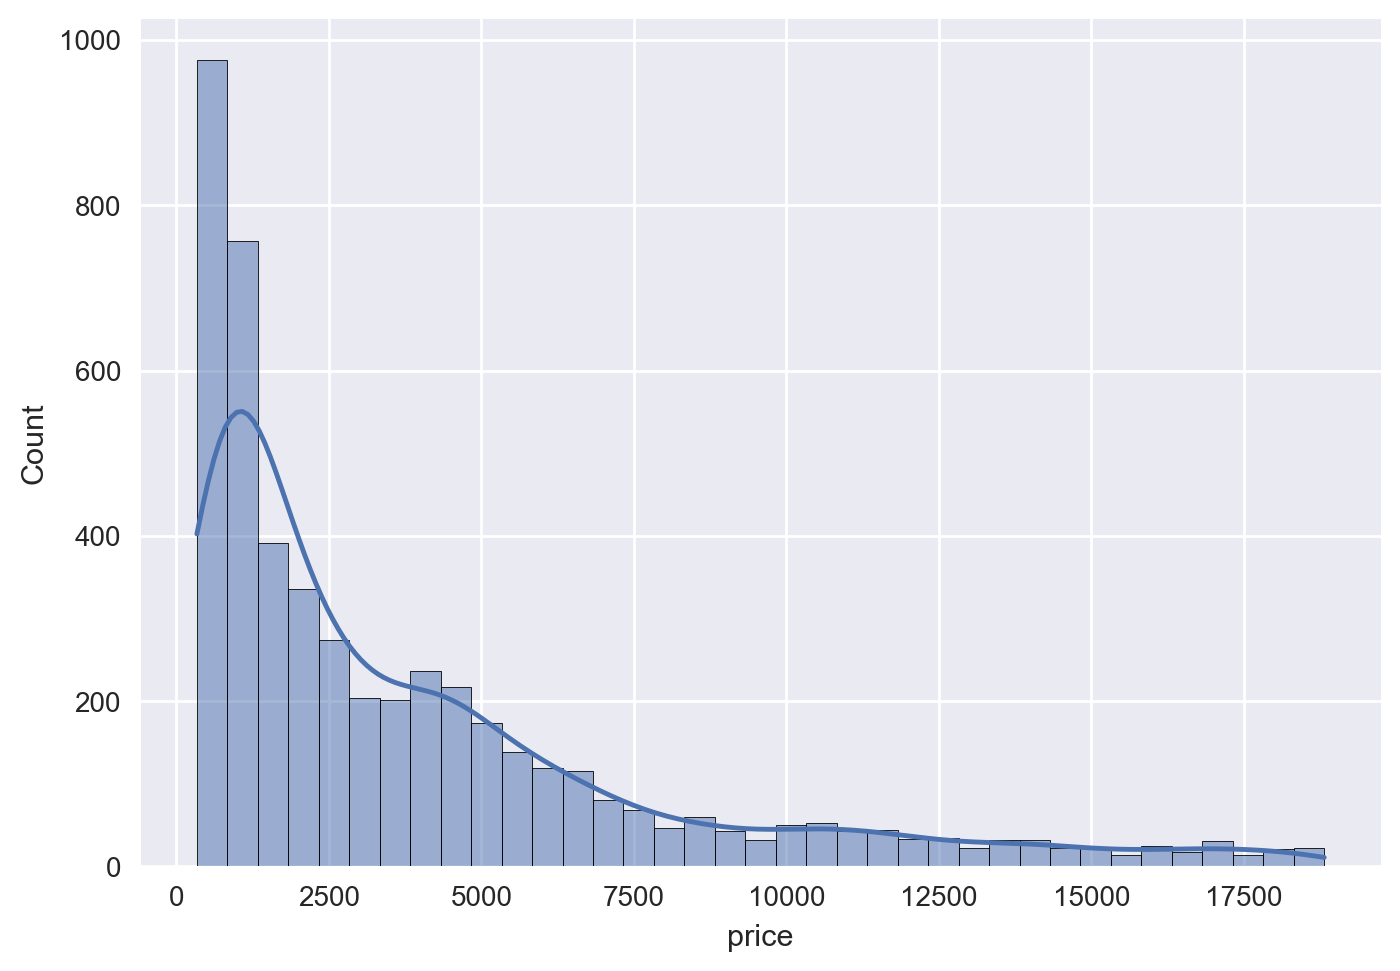

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

### Detail Analysis:
#### for Column Carat:
The histogram shows a right-skewed distribution of diamond carat weights, with the highest frequency around 0.5 carats and decreasing counts for larger sizes. The multimodal shape indicates clusters of diamonds at specific carat weights, suggesting different market segments or categories. Overall, smaller diamonds dominate the dataset compared to rarer, higher-carat gems.

#### for Depth:
The "depth" variable being analyzed follows a roughly normal distribution, with a central tendency around 61 and decreasing frequencies as the values deviate from the mean in either direction. The slight left skew indicates a higher prevalence of smaller depth values in the dataset.

#### for table:
The graph shows a multi-modal distribution with the highest peaks occurring at values 54, 56, and 58. The overall pattern is irregular, suggesting complex underlying factors influencing the observed counts or frequencies.Overall similar to normal distribution.

#### for x:
This graph shows a frequency distribution plot with the x-axis representing Length of Diamond(labeled "x") and the y-axis showing the count or frequency. The distribution is multi-modal, with distinct peaks at values 4, 6, and 7, suggesting these values have higher frequencies or occurrences compared to others in the range. 

#### for Price:
The graph provides insights into the distribution of prices within the given range, highlighting the concentration of occurrences at lower price points and the relatively fewer instances as prices increase.

### Bar Chart   of all the categorical Columns(''cut', 'color', 'clarity')

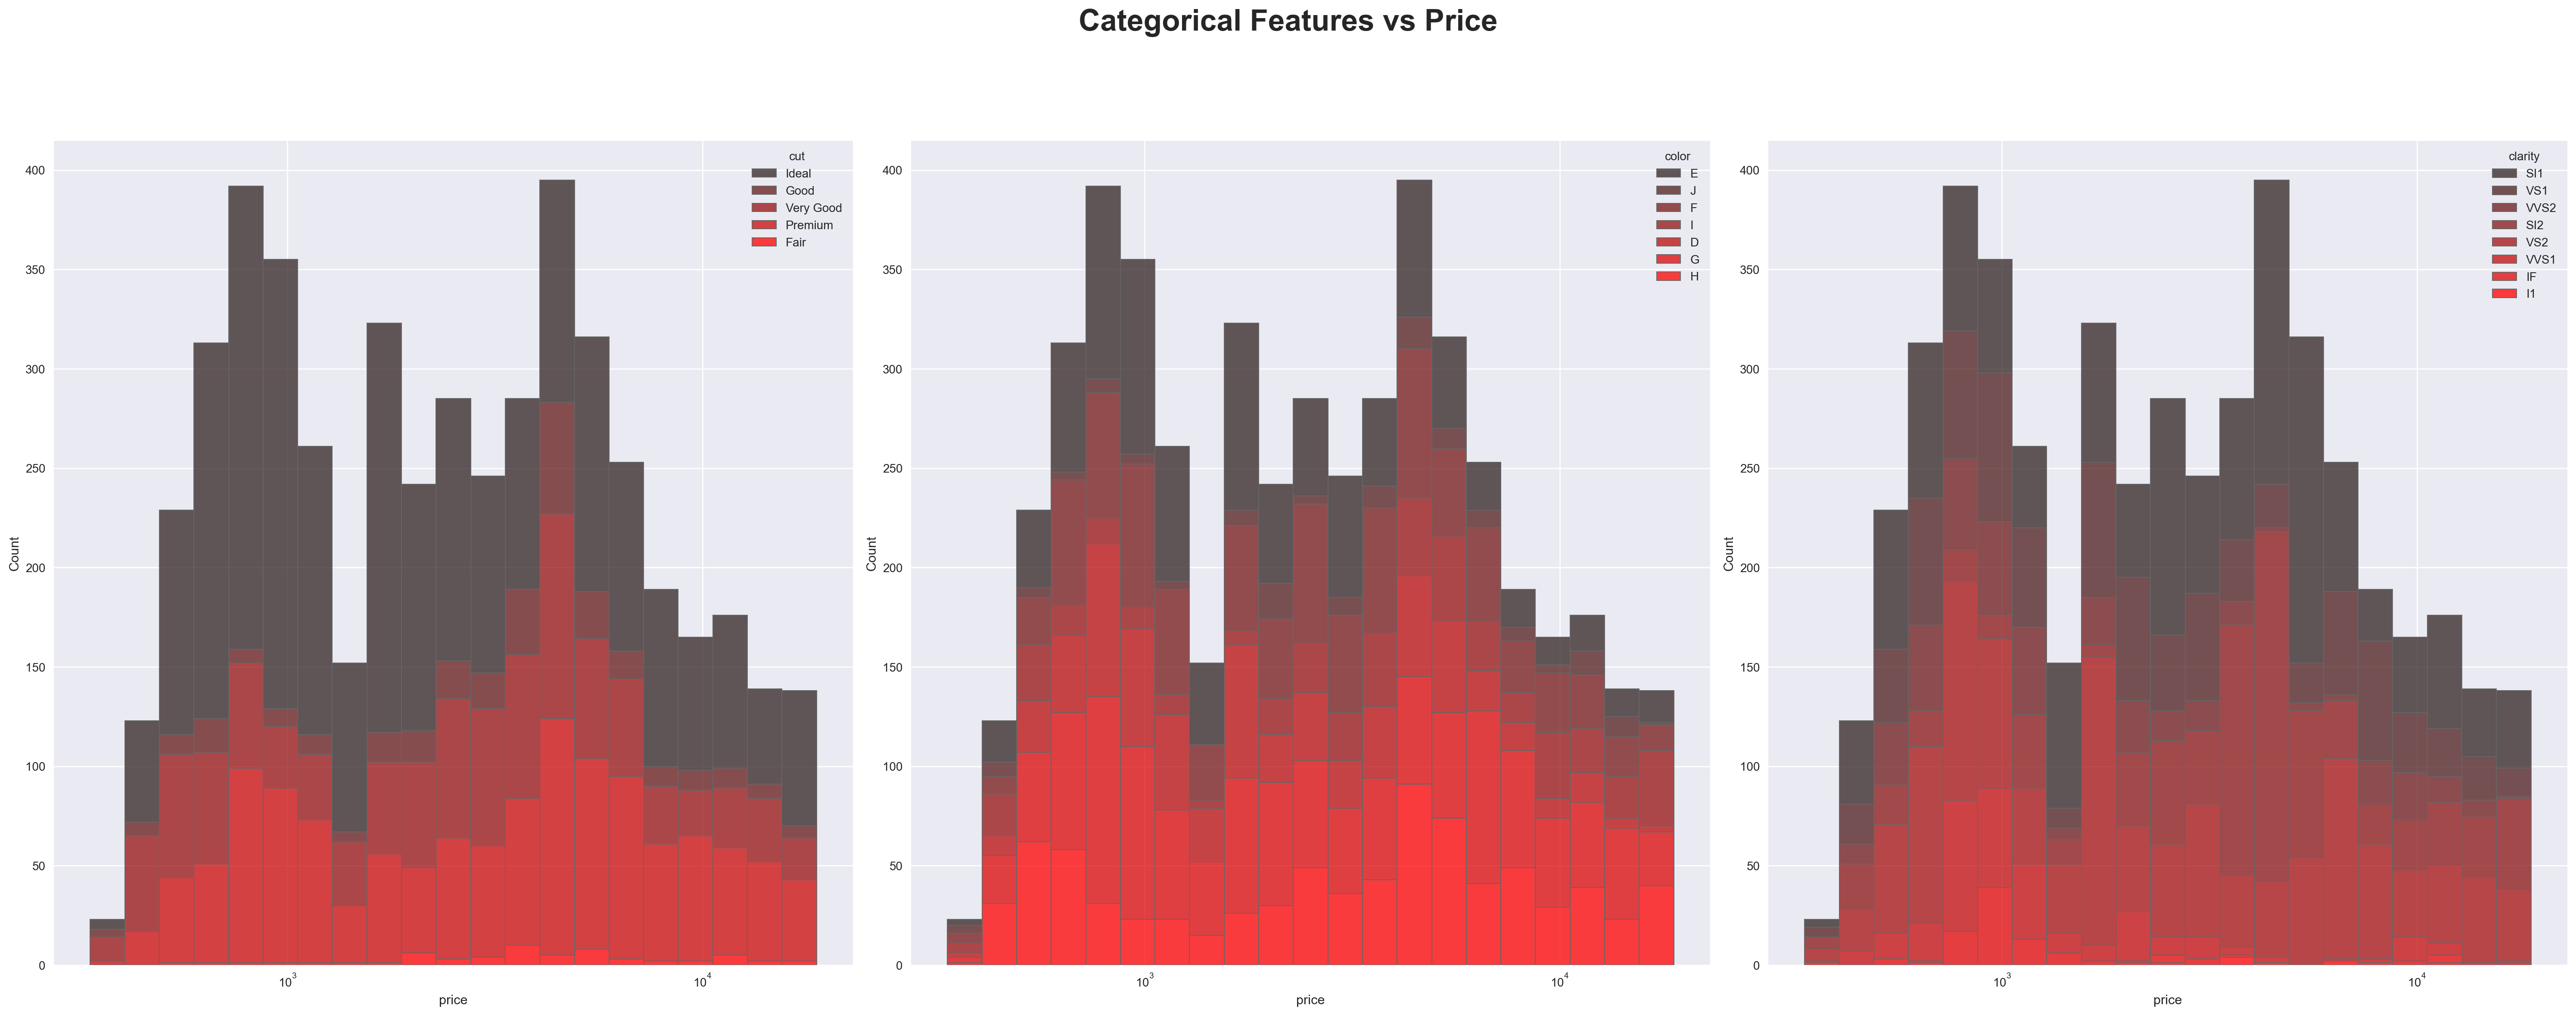

In [113]:
## Assignment Do the same for categorical data
fig, ax = plt.subplots(1, 3, figsize=(30, 12), dpi=100)
ax = ax.flatten()
for i, ft in enumerate(['cut', 'color', 'clarity']):
    sns.histplot(
        data=df,
        x="price", hue=ft,
        multiple="stack",
        palette="dark:red",
        edgecolor=".4",
        linewidth=.7,
        log_scale=True,
        ax=ax[i]
    )
fig.suptitle(f'Categorical Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

### Detail Analysis:
#### Subplot 1 (top left): 
This subplot shows the relationship between diamond color and price. The bars represent different diamond color grades, with the peak around lower price ranges corresponding to more common/lower color grades. As the prices increase, the frequency of rarer/higher color grades becomes lower, as indicated by the decreasing bar heights.

#### Subplot 2 (top right): 
This subplot shows the relationship between diamond clarity and price. The colored bars  represent different clarity grades, with the peak suggesting a high concentration of lower clarity grades at lower price points. As prices rise, the frequency of higher clarity grades decreases, reflecting their relative rarity and premium pricing.

#### Subplot 3 (bottom left):
This subplot shows the relationship between cut quality and diamond price. The bars indicate different cut grades, with the peak at lower prices corresponding to more common or lower cut qualities. As prices increase, the frequency of higher cut qualities, which are rarer and more valuable, decreases gradually.

Overall, these subplots highlight how the key characteristics of diamonds, namely color, clarity, and cut, significantly influence their pricing. Lower grades tend to be more abundant and concentrated at lower price points, while higher grades command premium prices due to their relative scarcity and desirability in the diamond market.

### Boxplots of all the numerical_columns

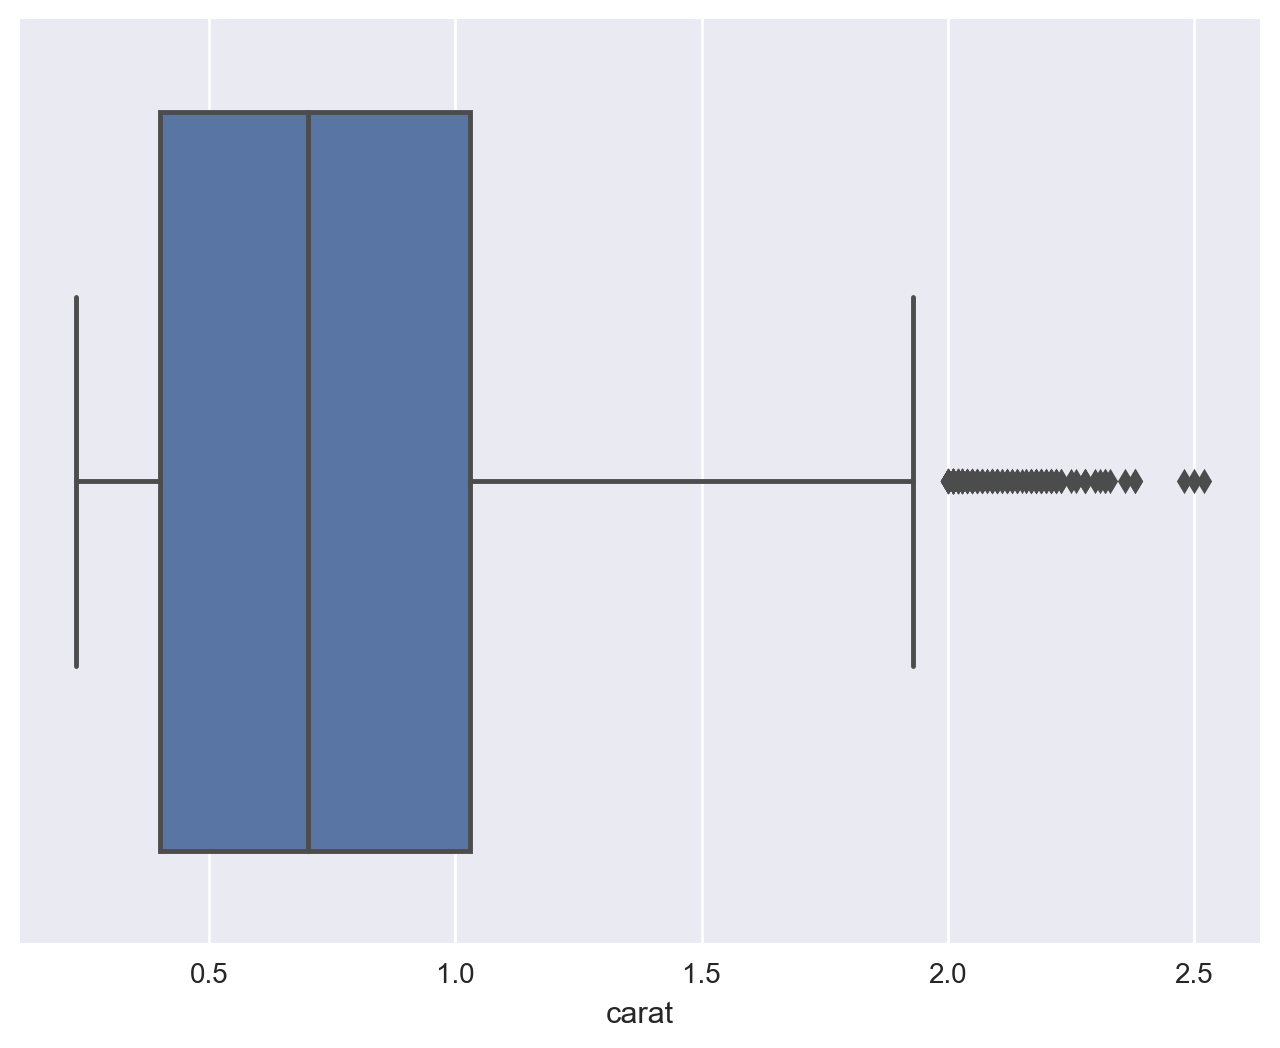

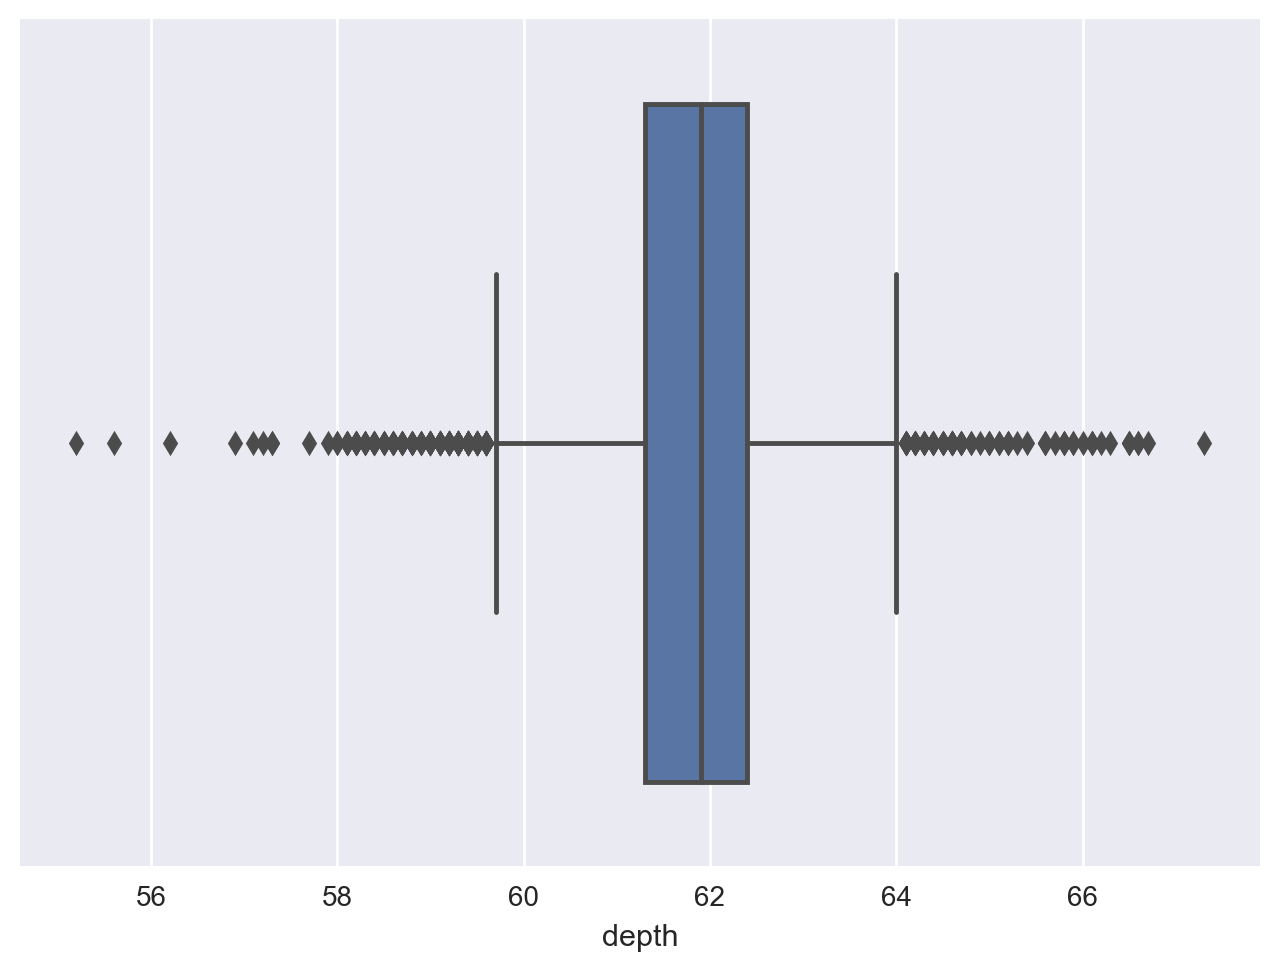

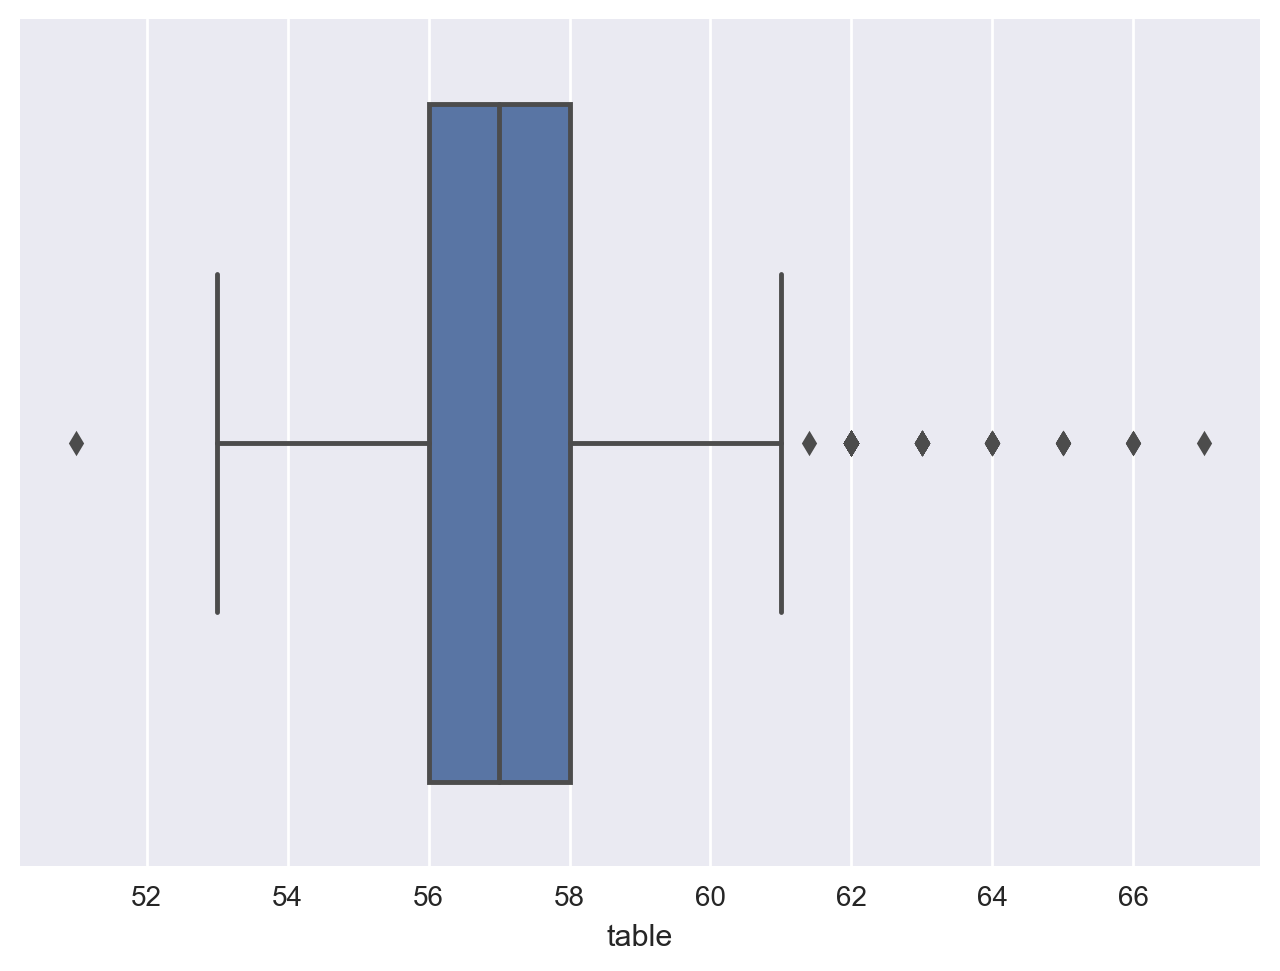

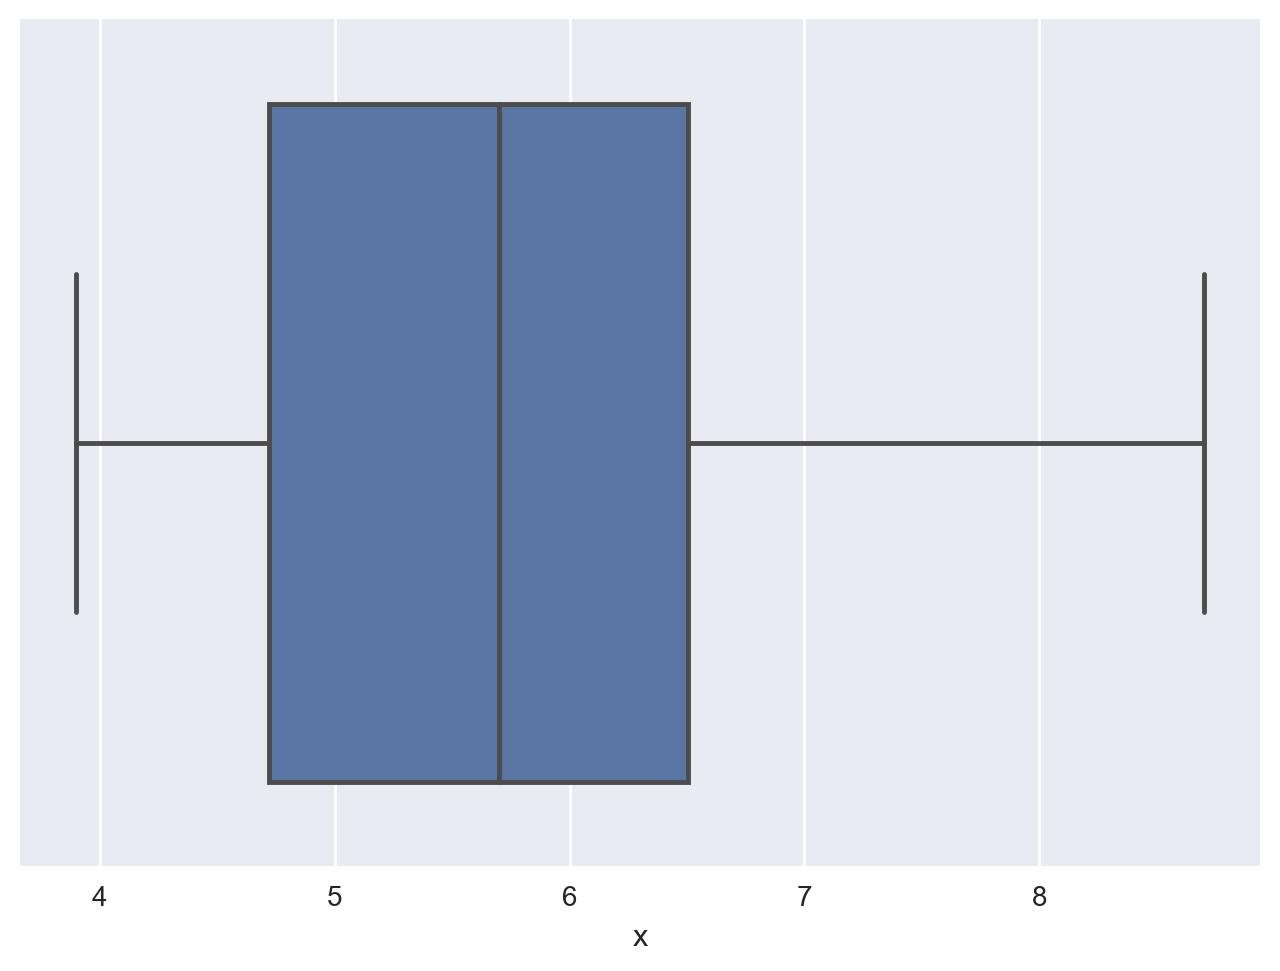

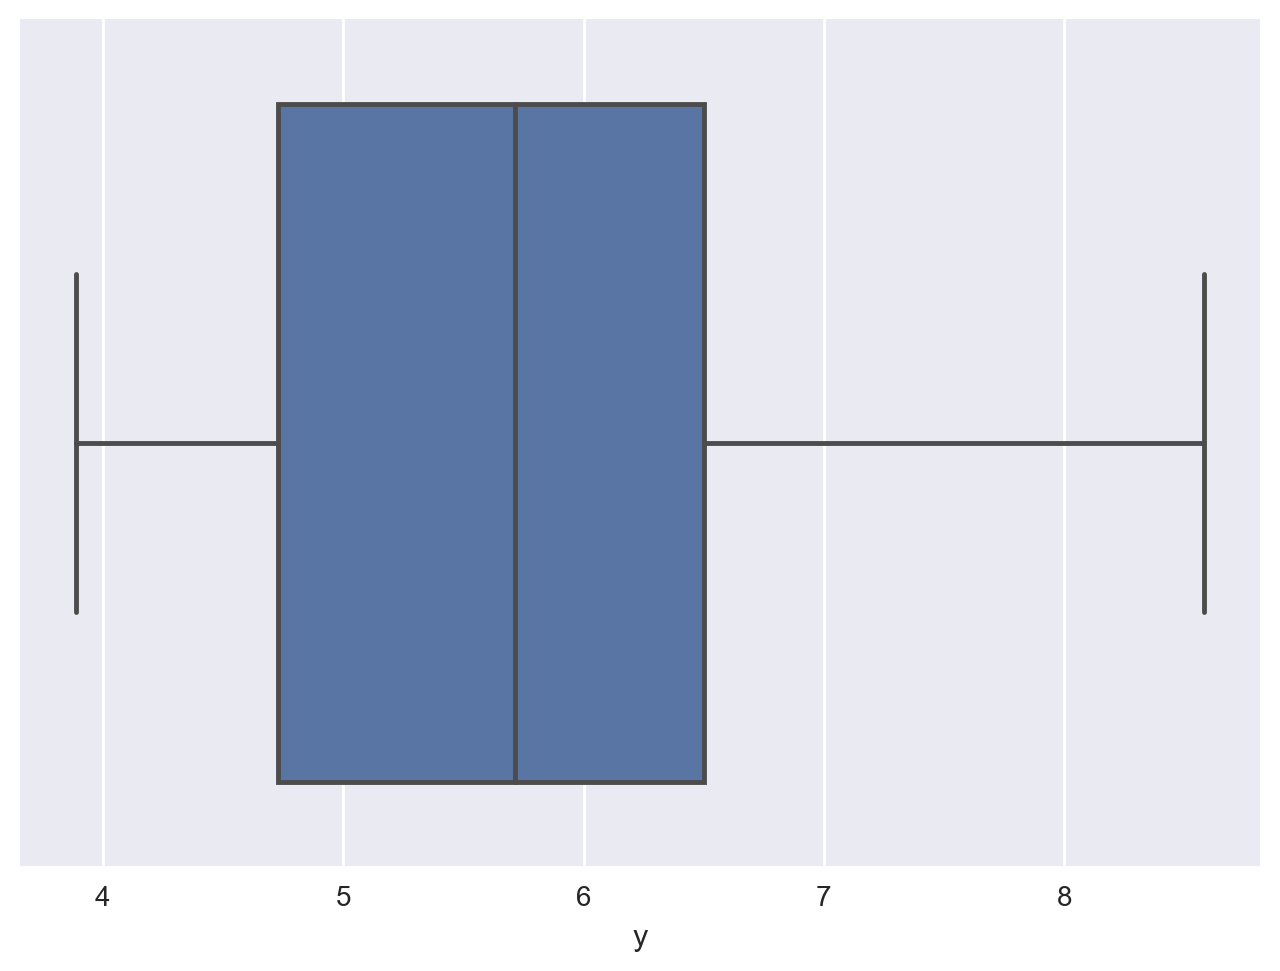

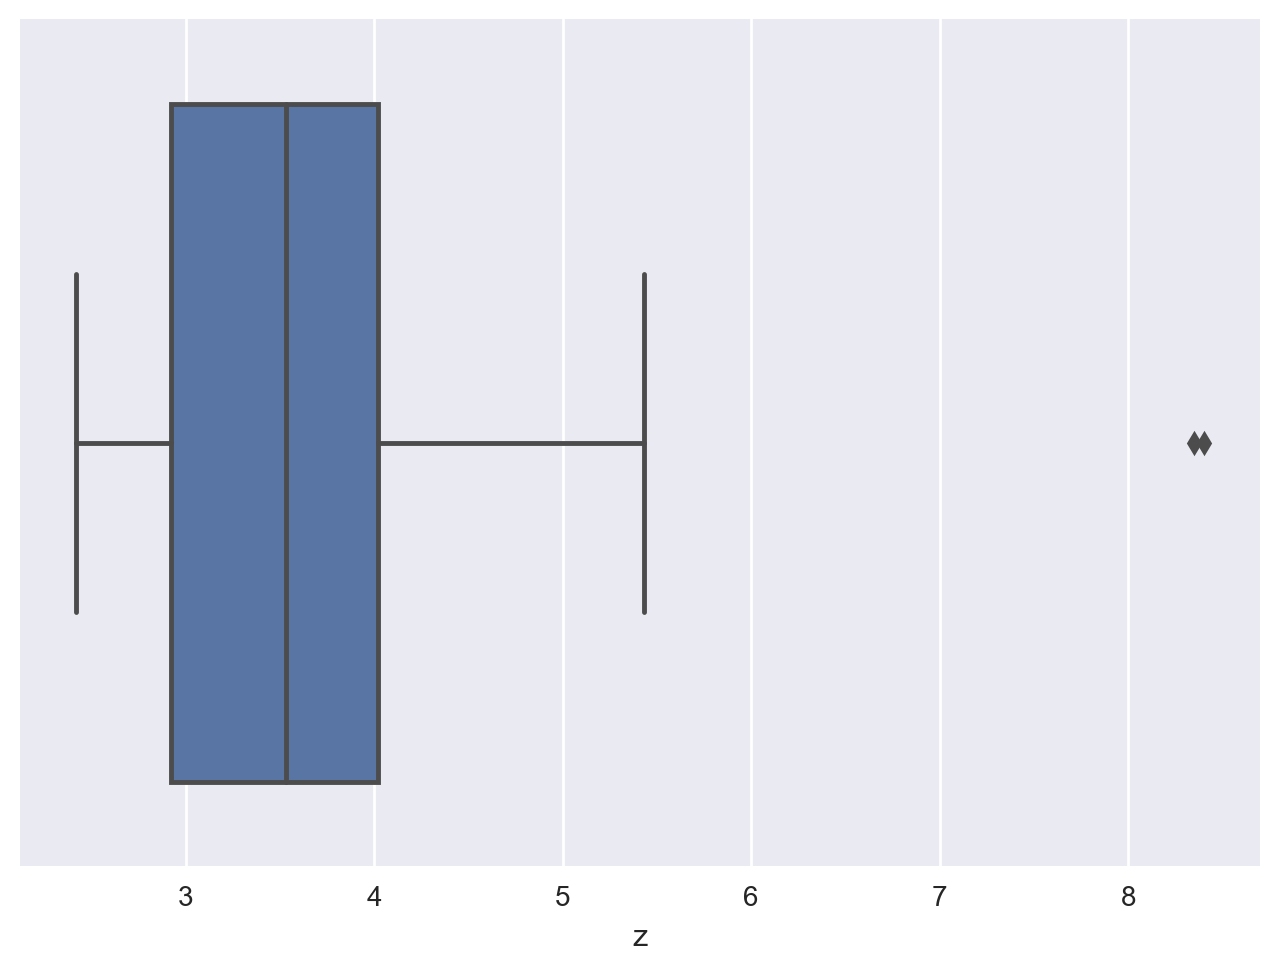

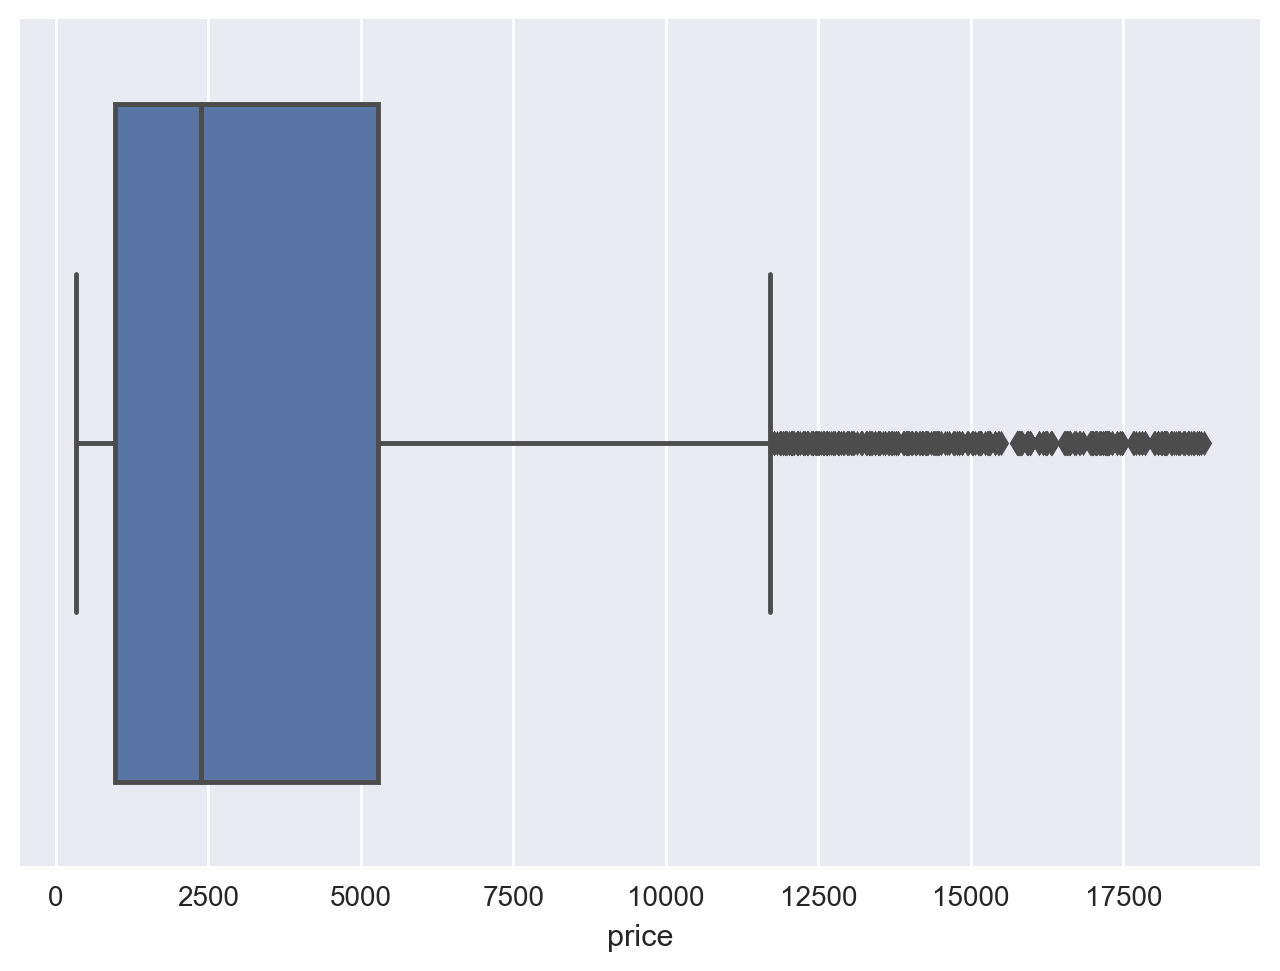

In [118]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.boxplot(data=df,x=i)
    print('\n')
    plt.show()
    


### Details Analysis
All the boxplots are fine,except the price .The distribution of price is clearly right-skewed and has a huge range, which indicates the price variable will probably need some transformation in the second phase of the project.

## KDE PLot of Price

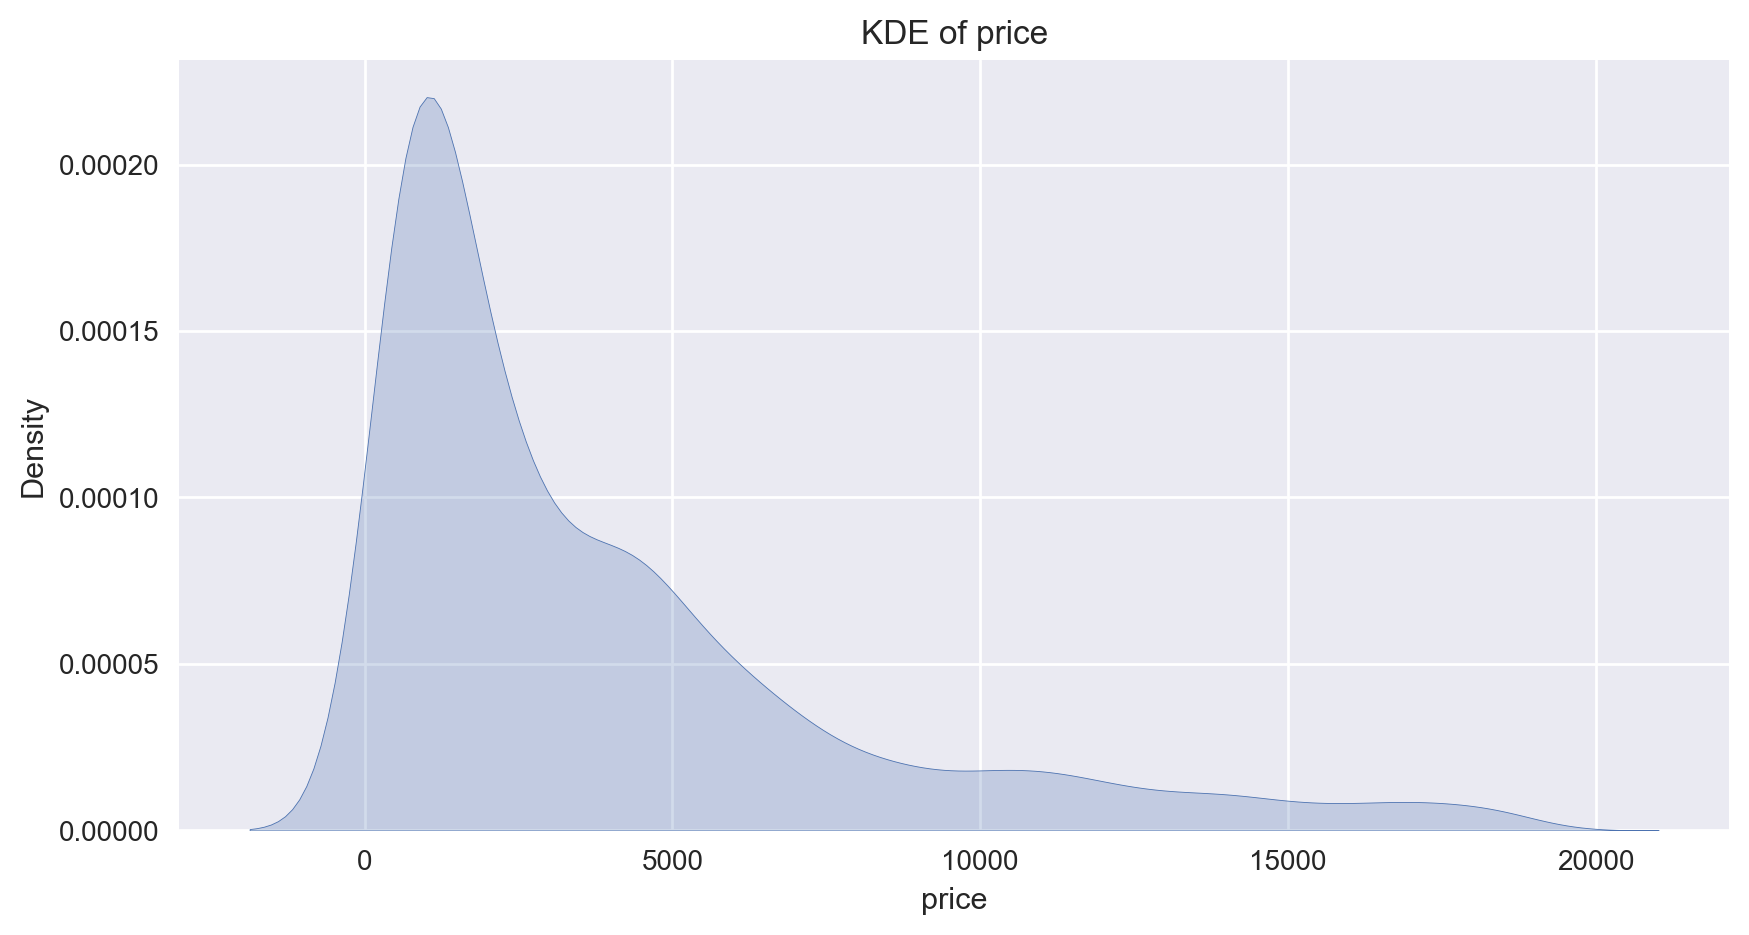

In [159]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'],fill=True)
plt.xlabel('price')
plt.title('KDE of price')
plt.show()

## Two-Variable Visualisation

### Scatter Plot

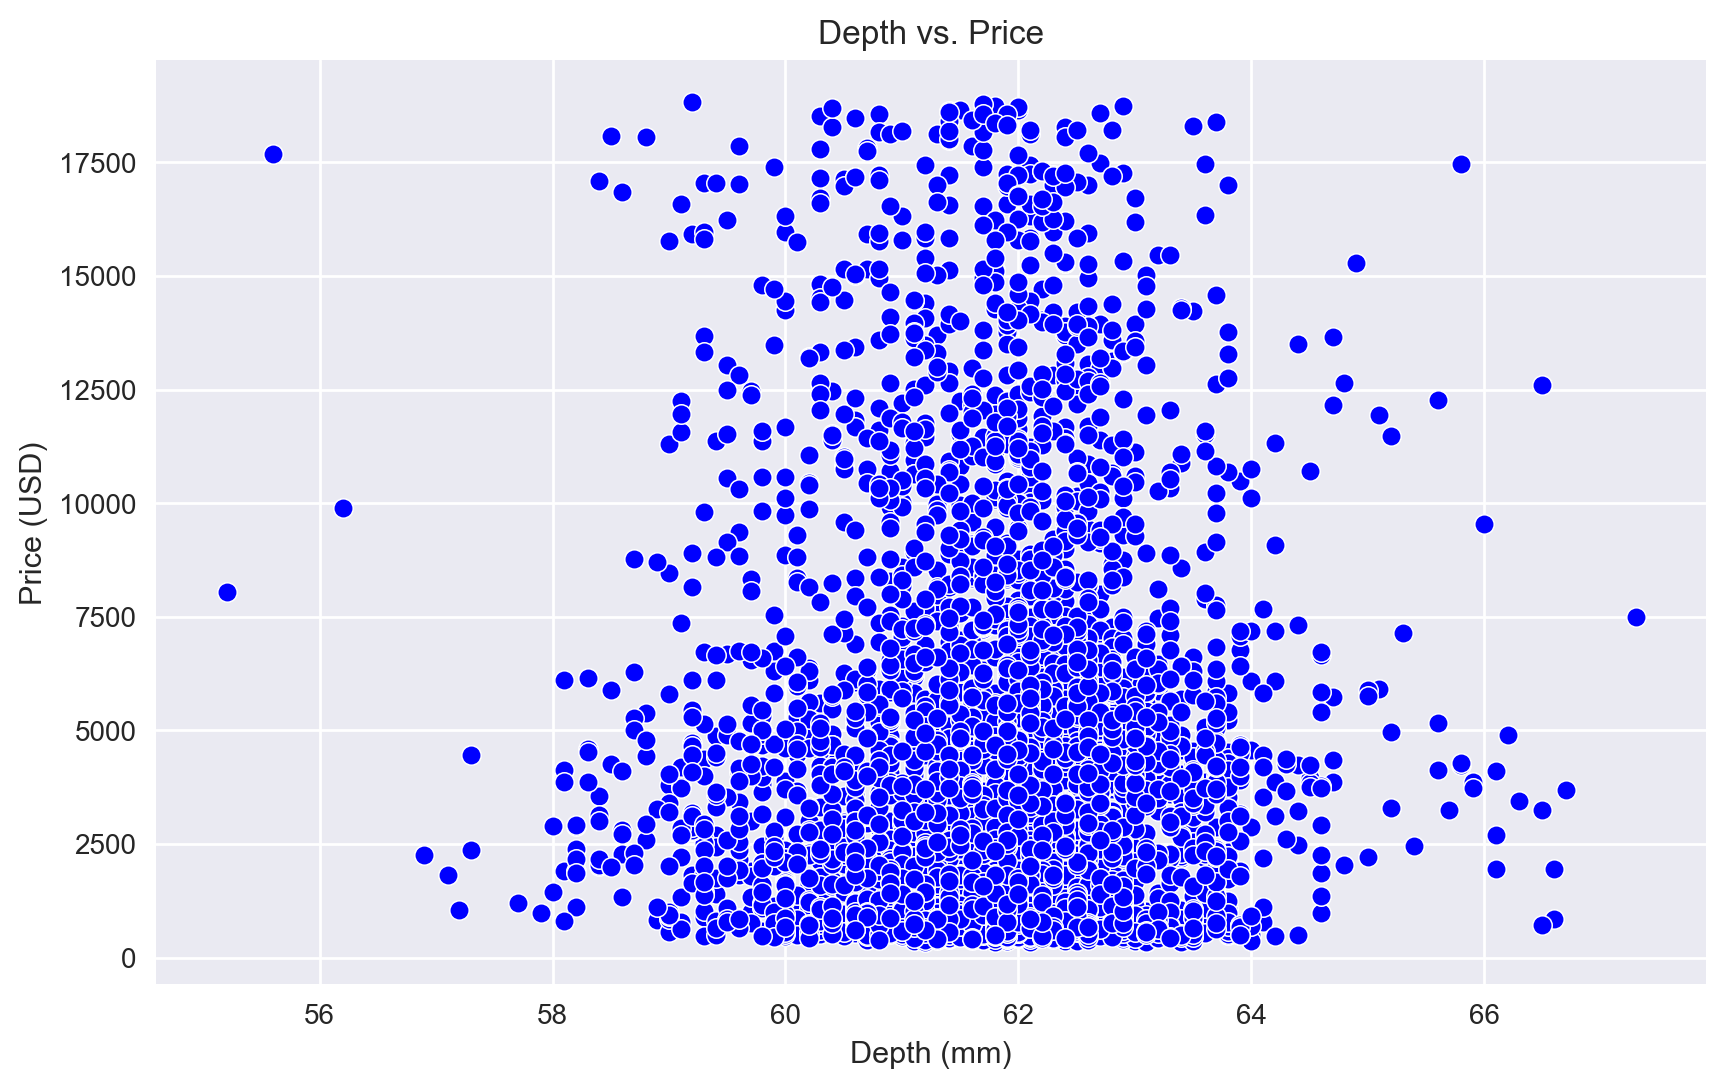

In [143]:
# Scatter Plot for Depth vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depth', y='price', color='blue')
plt.title('Depth vs. Price')
plt.xlabel('Depth (mm)')
plt.ylabel('Price (USD)')
plt.show()



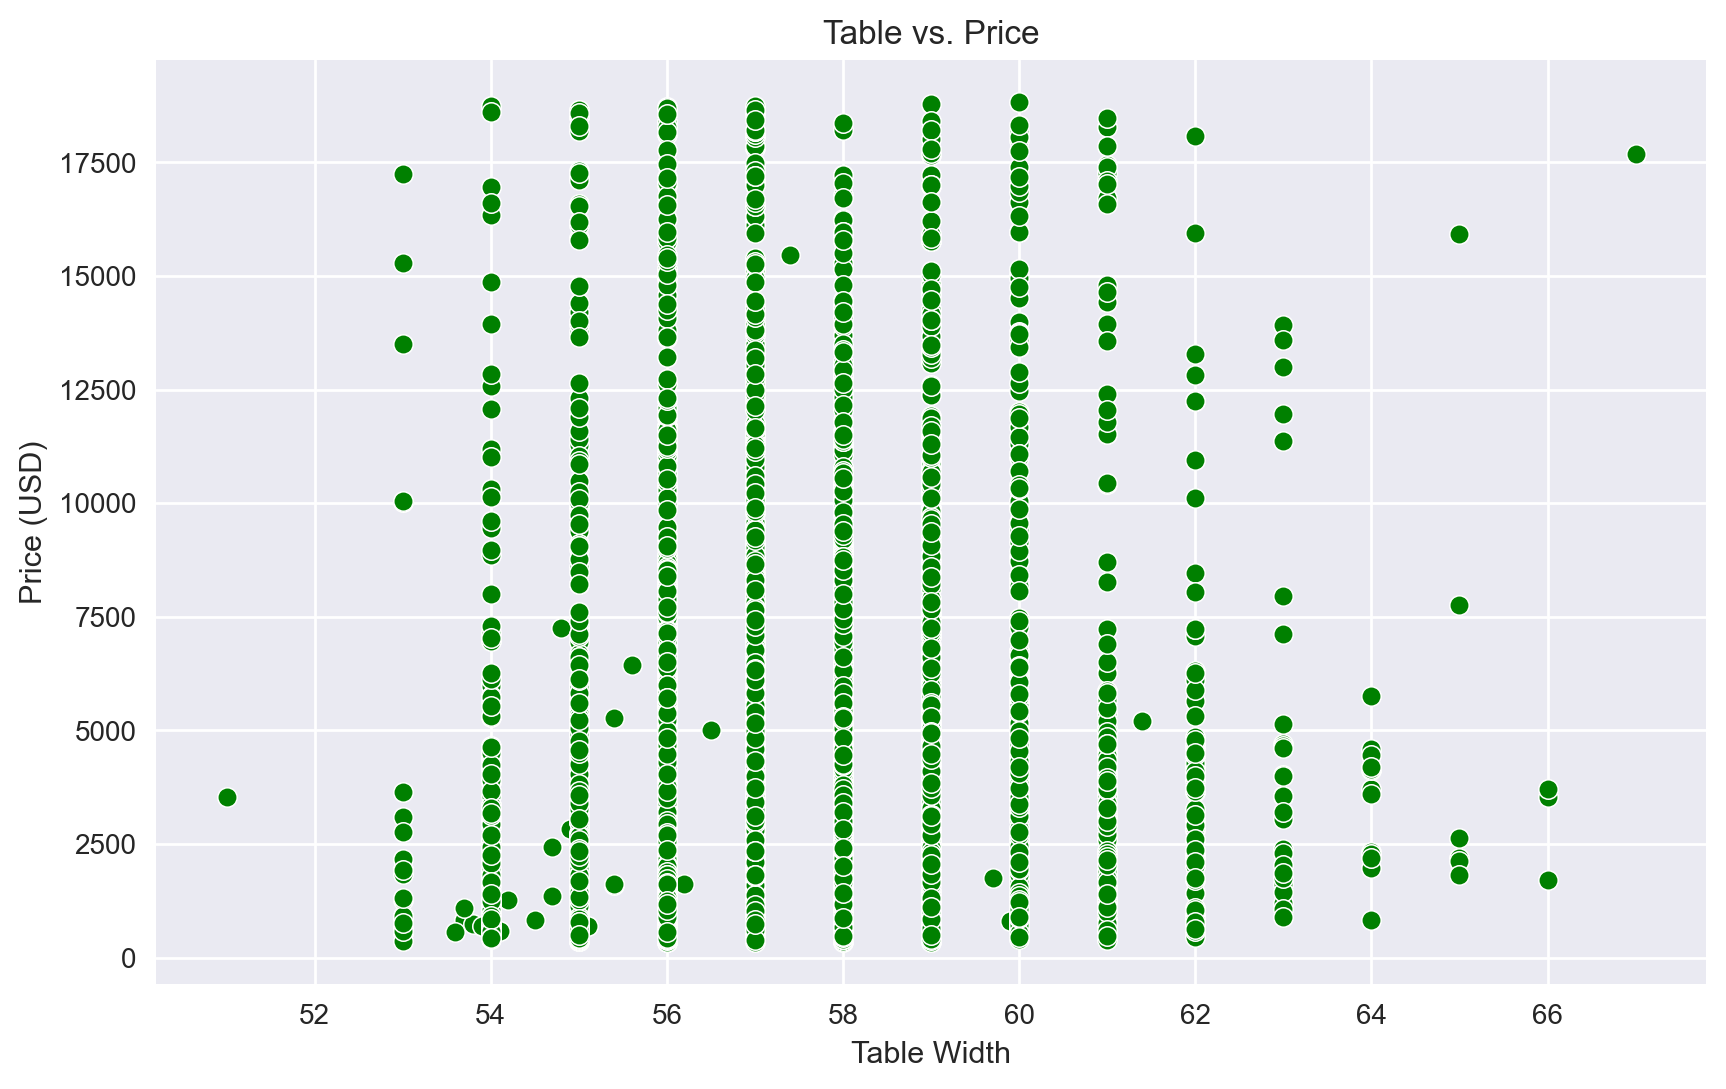

In [144]:
# Scatter Plot for Table vs. Price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='table', y='price', color='green')
plt.title('Table vs. Price')
plt.xlabel('Table Width')
plt.ylabel('Price (USD)')
plt.show()

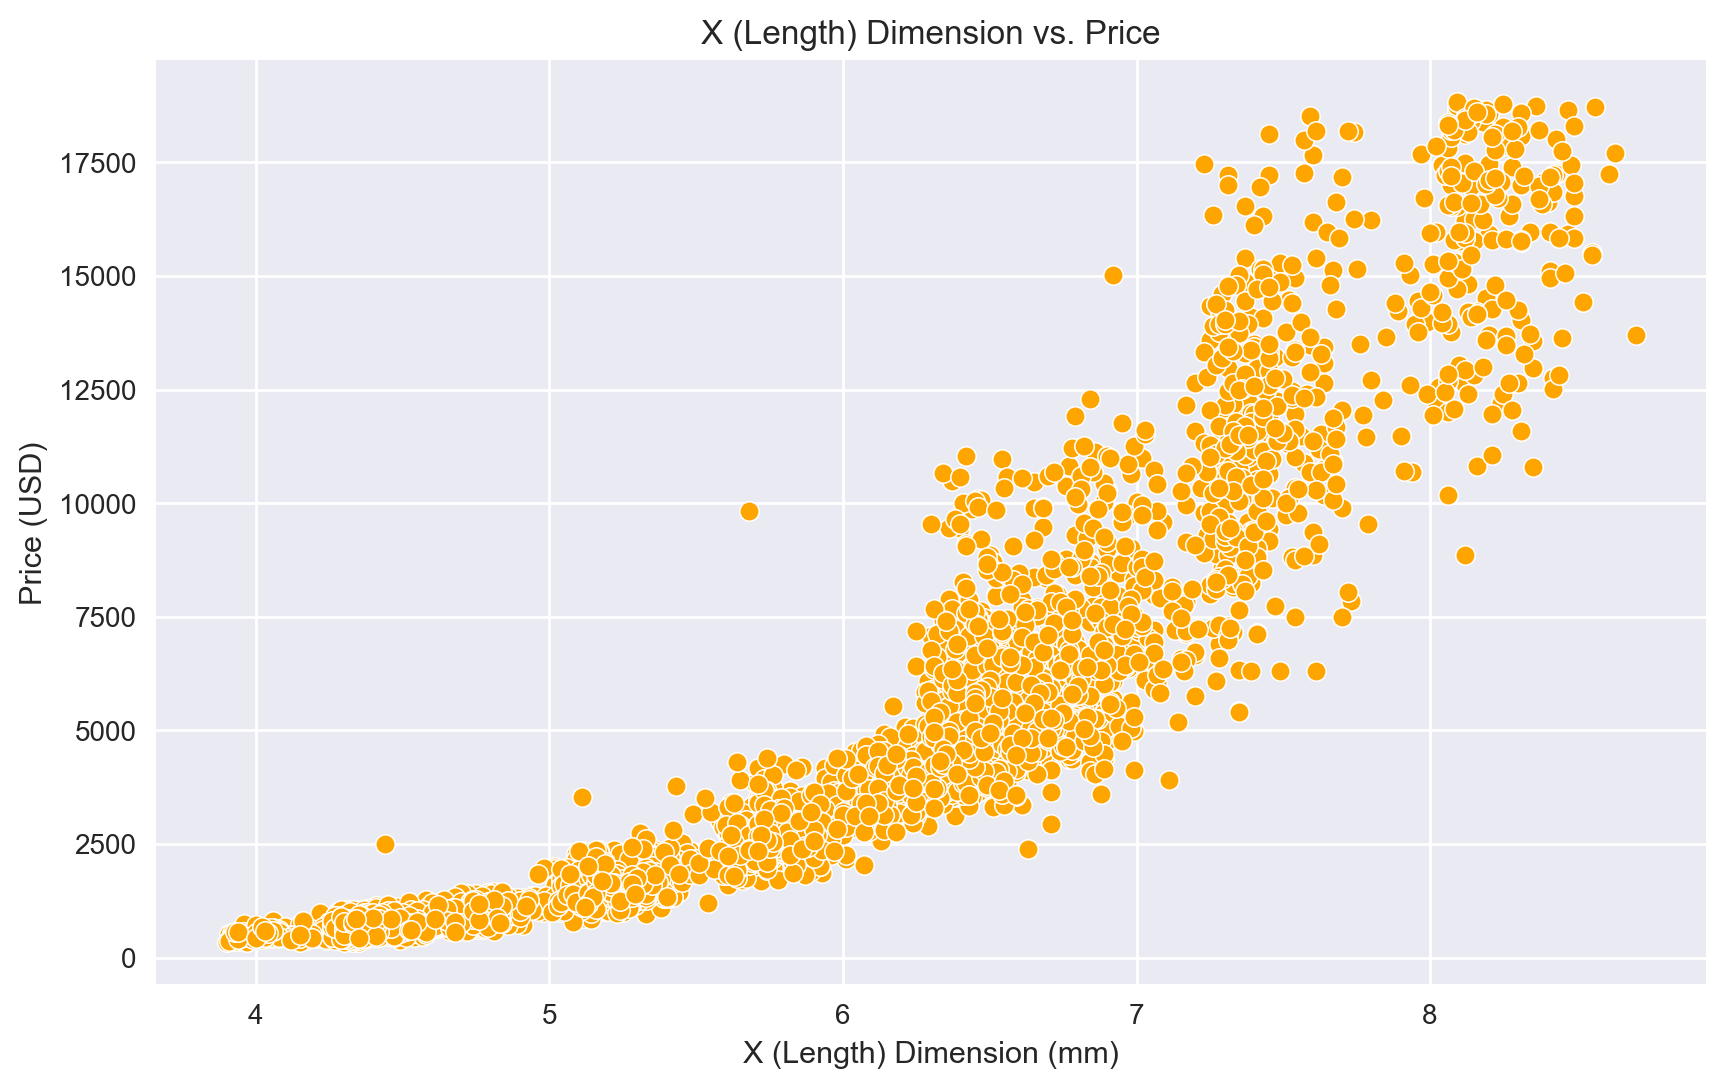

In [154]:
# Scatter Plot for (Length)X vs. Price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='price', color='orange')
plt.title('X (Length) Dimension vs. Price')
plt.xlabel('X (Length) Dimension (mm)')
plt.ylabel('Price (USD)')
plt.show()



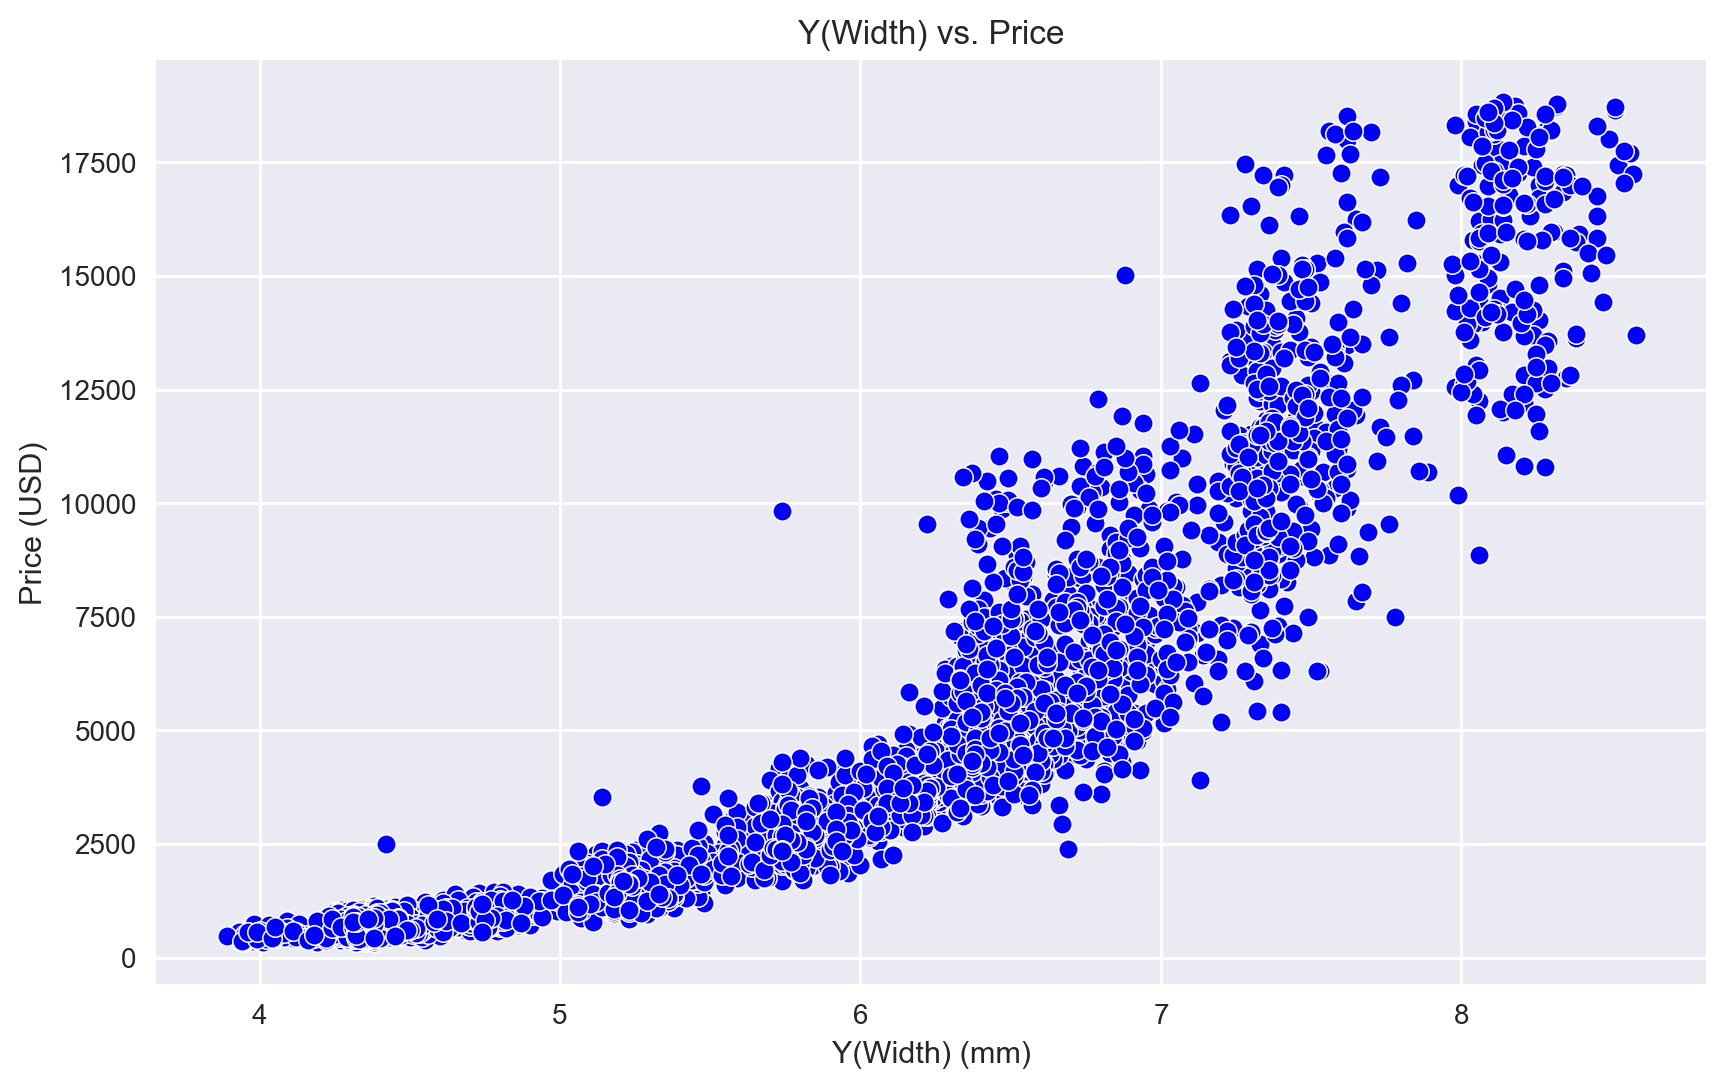

In [156]:
# Scatter Plot for Y(Width vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='y', y='price', color='blue')
plt.title('Y(Width) vs. Price')
plt.xlabel('Y(Width) (mm)')
plt.ylabel('Price (USD)')
plt.show()



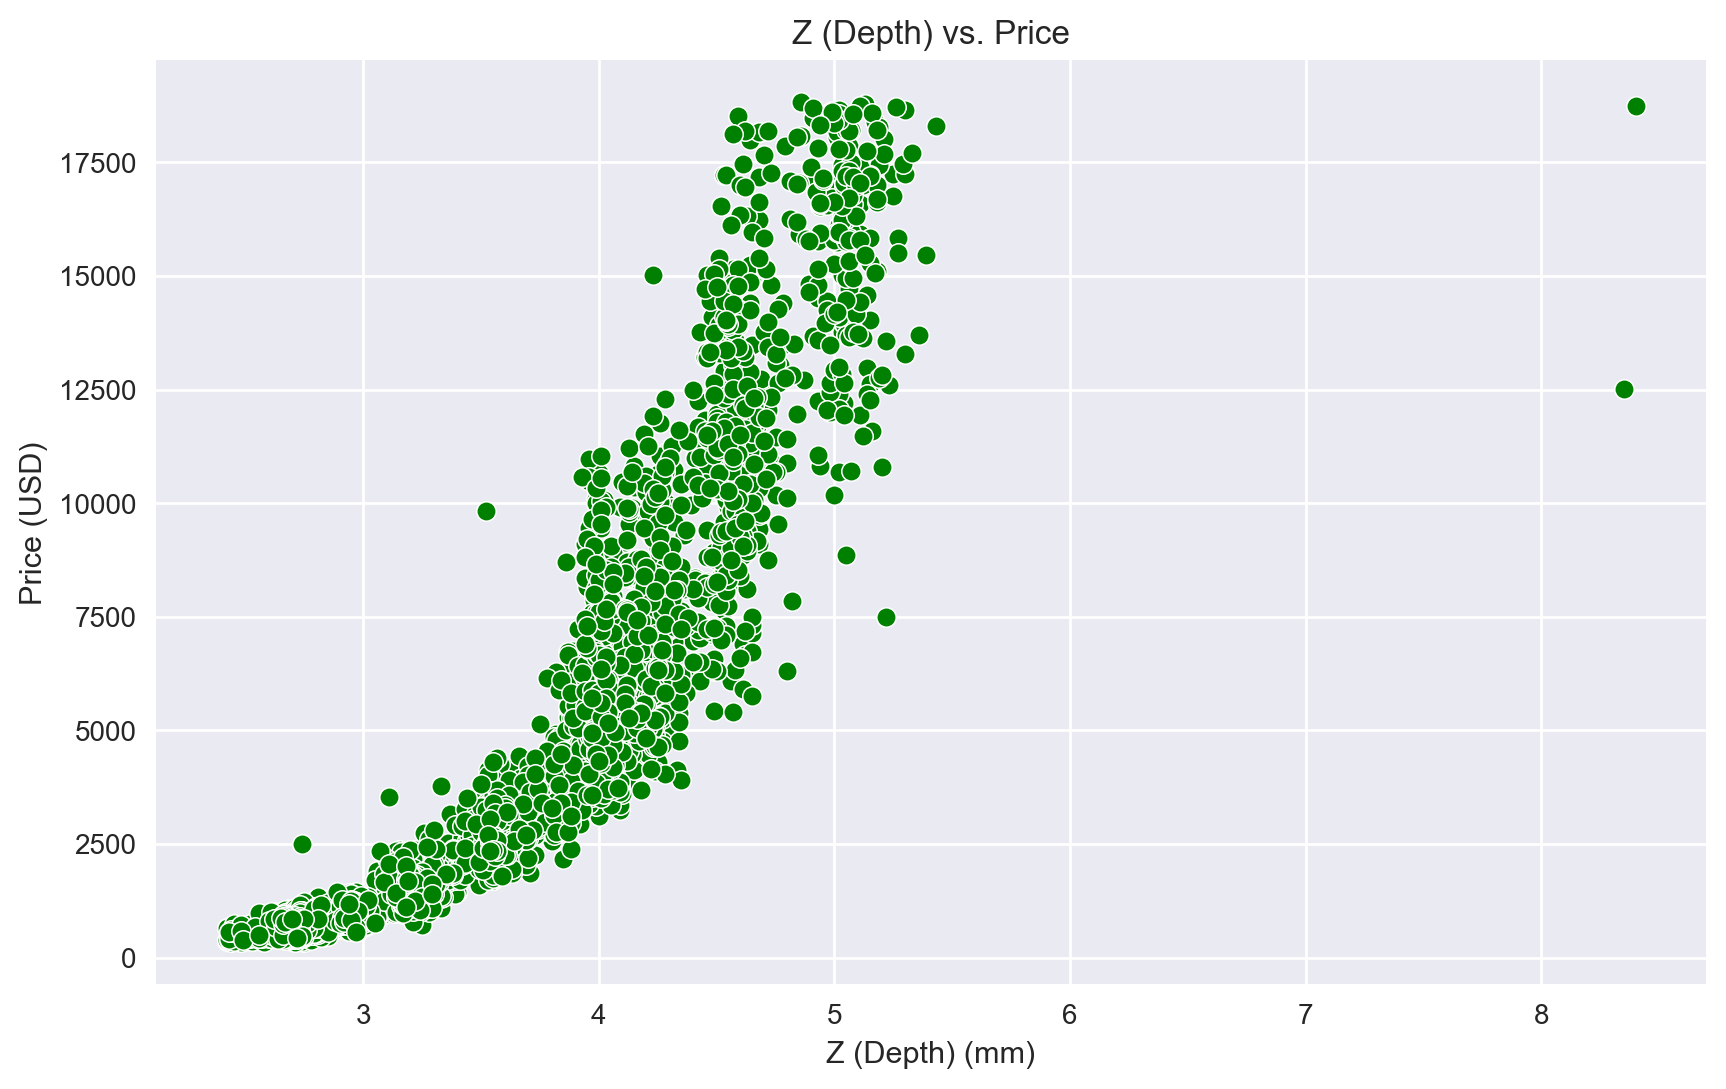

In [157]:
# Scatter Plot for Z(Depth) vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='z', y='price', color='green')
plt.title('Z (Depth) vs. Price')
plt.xlabel('Z (Depth) (mm)')
plt.ylabel('Price (USD)')
plt.show()

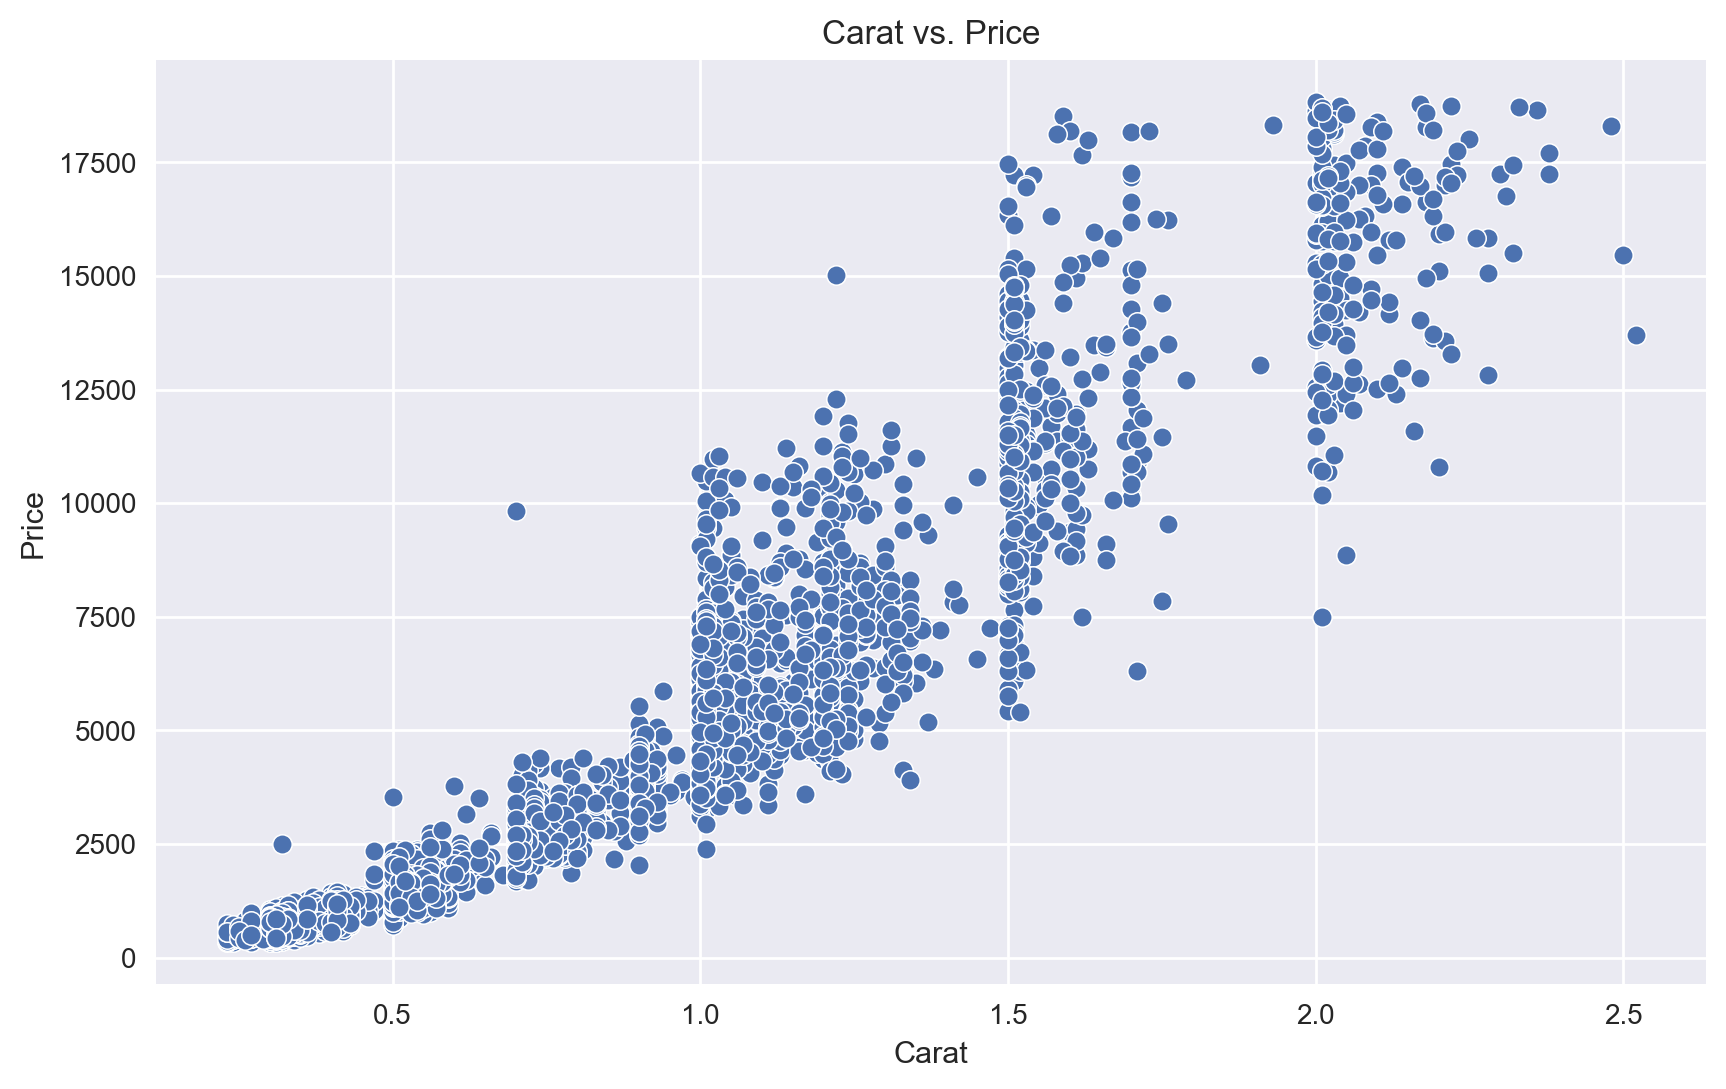

In [158]:
# Carat vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()



## BarPlot

<function matplotlib.pyplot.show(close=None, block=None)>

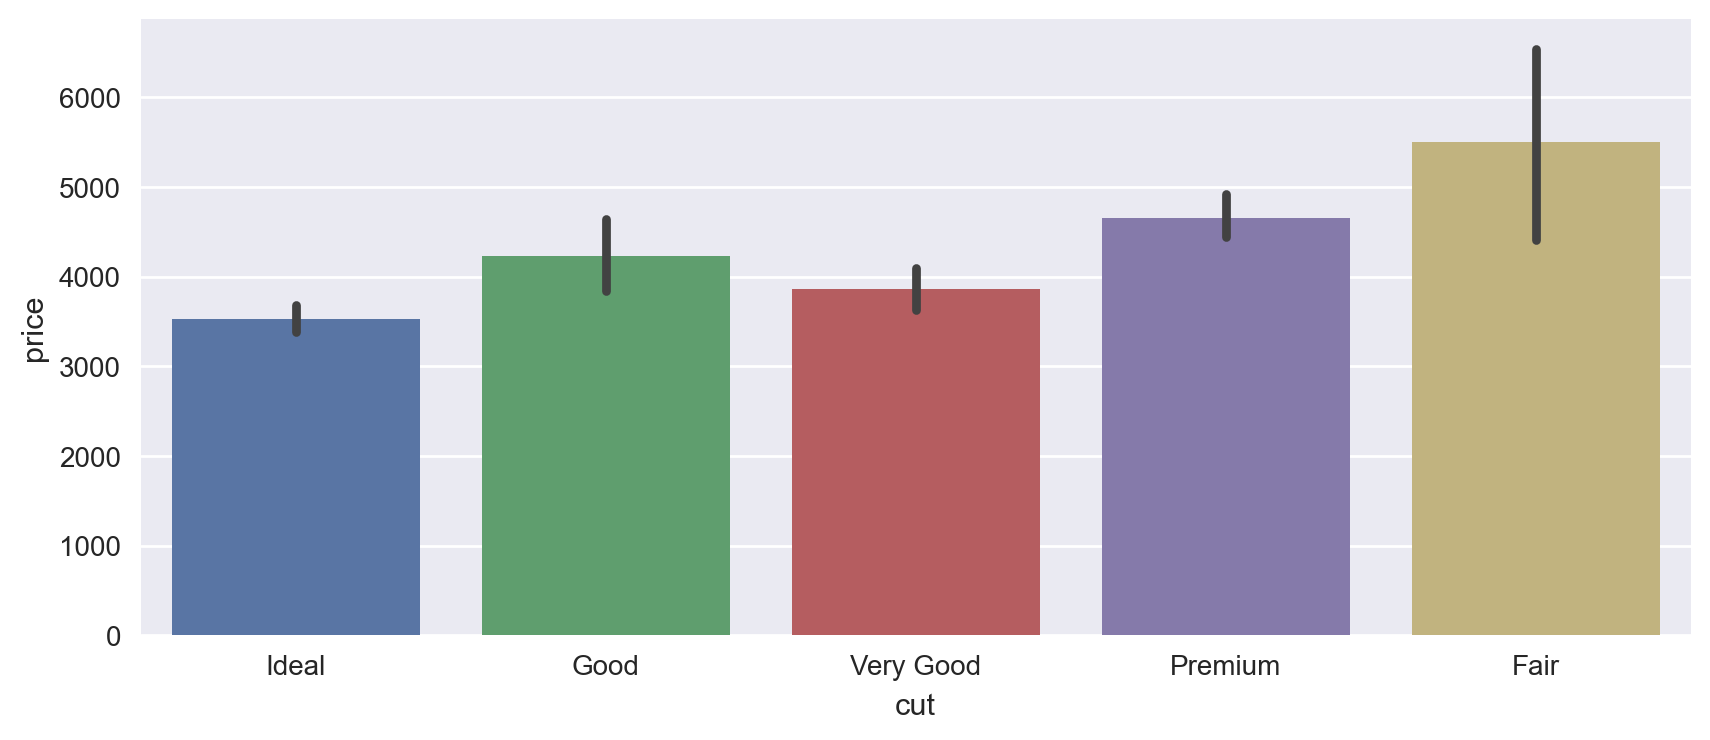

In [122]:
#Barplot in between Price and Cut
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='cut')
plt.show

## BOXPLOT

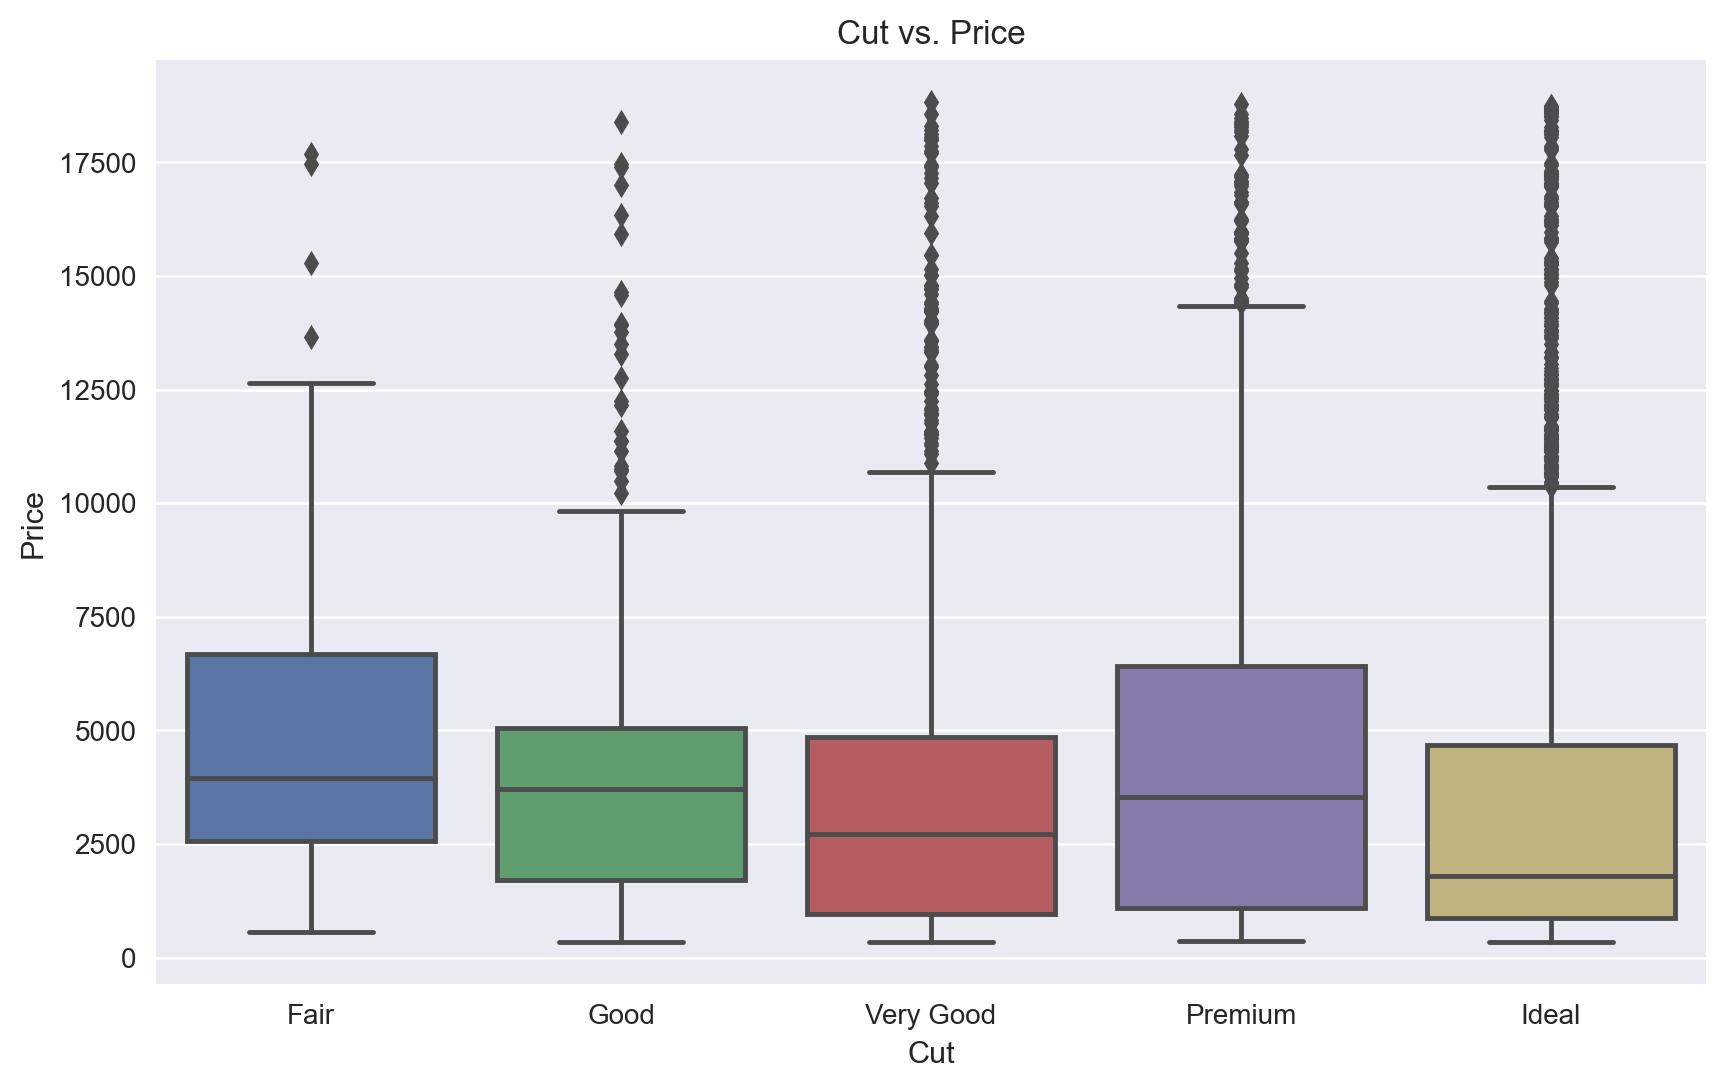

In [125]:
# Cut vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Cut vs. Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()



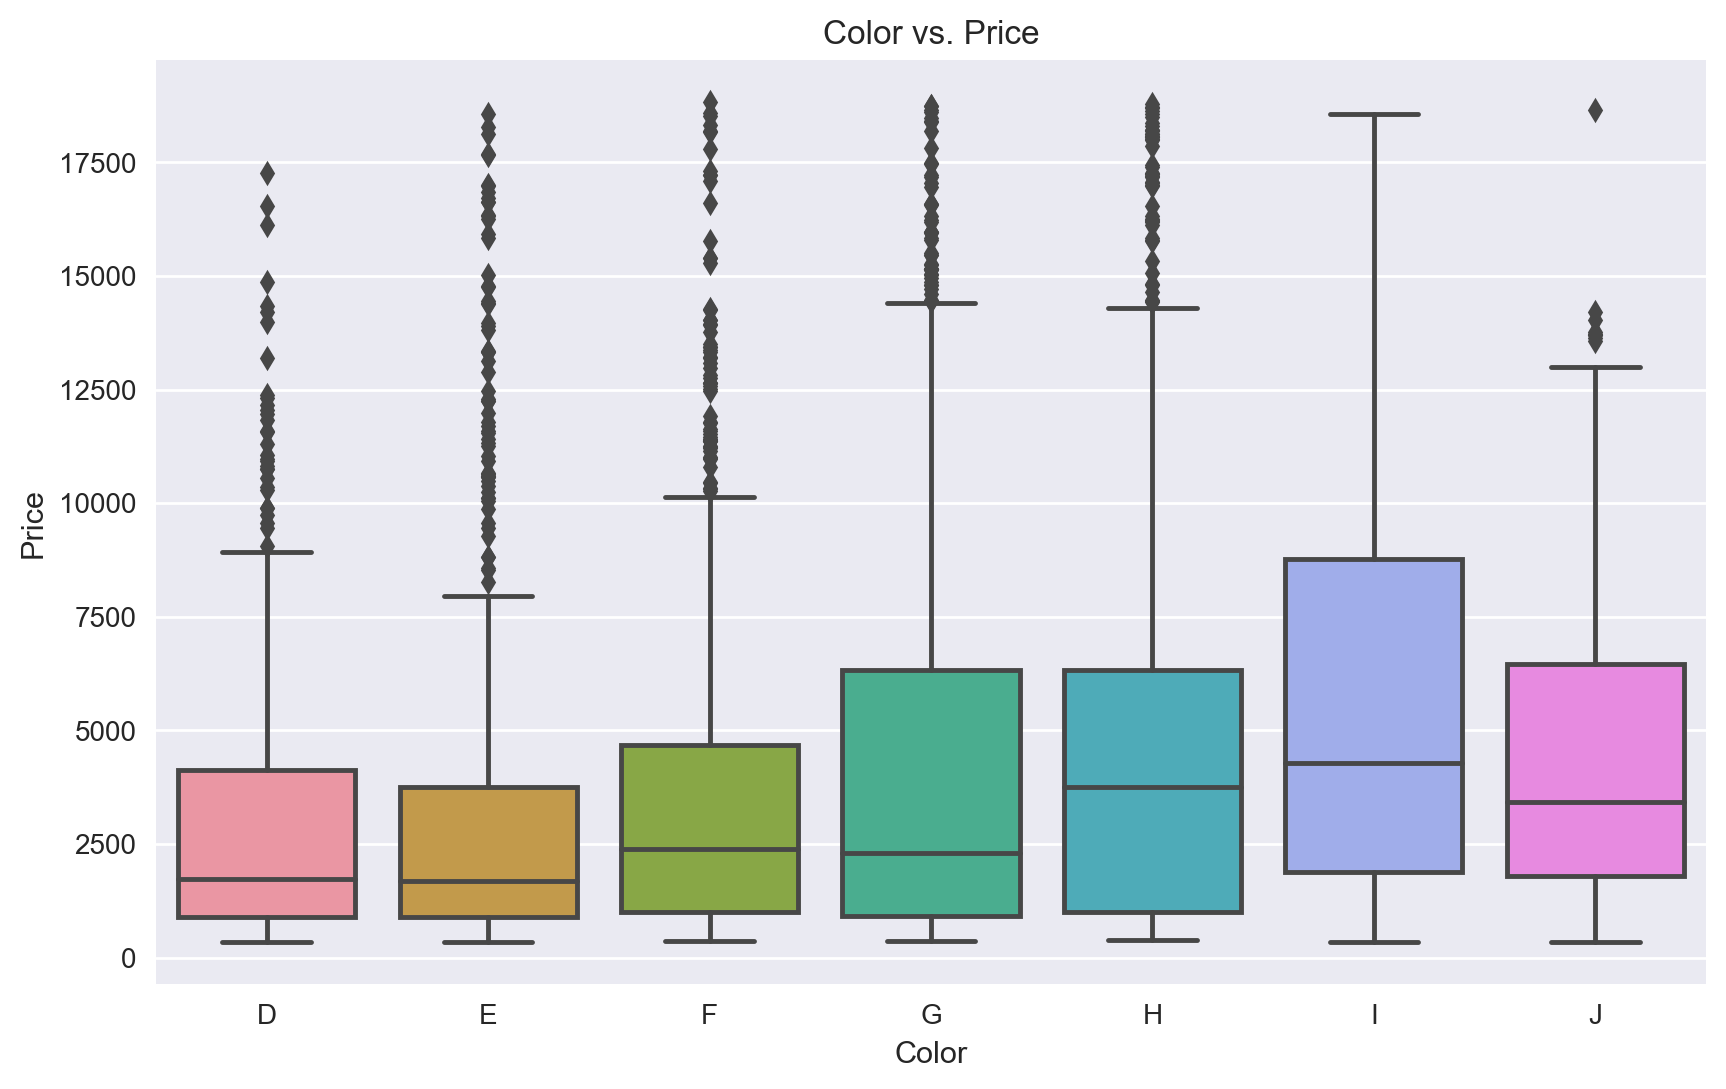

In [126]:
# Color vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='color', y='price', order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Color vs. Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()



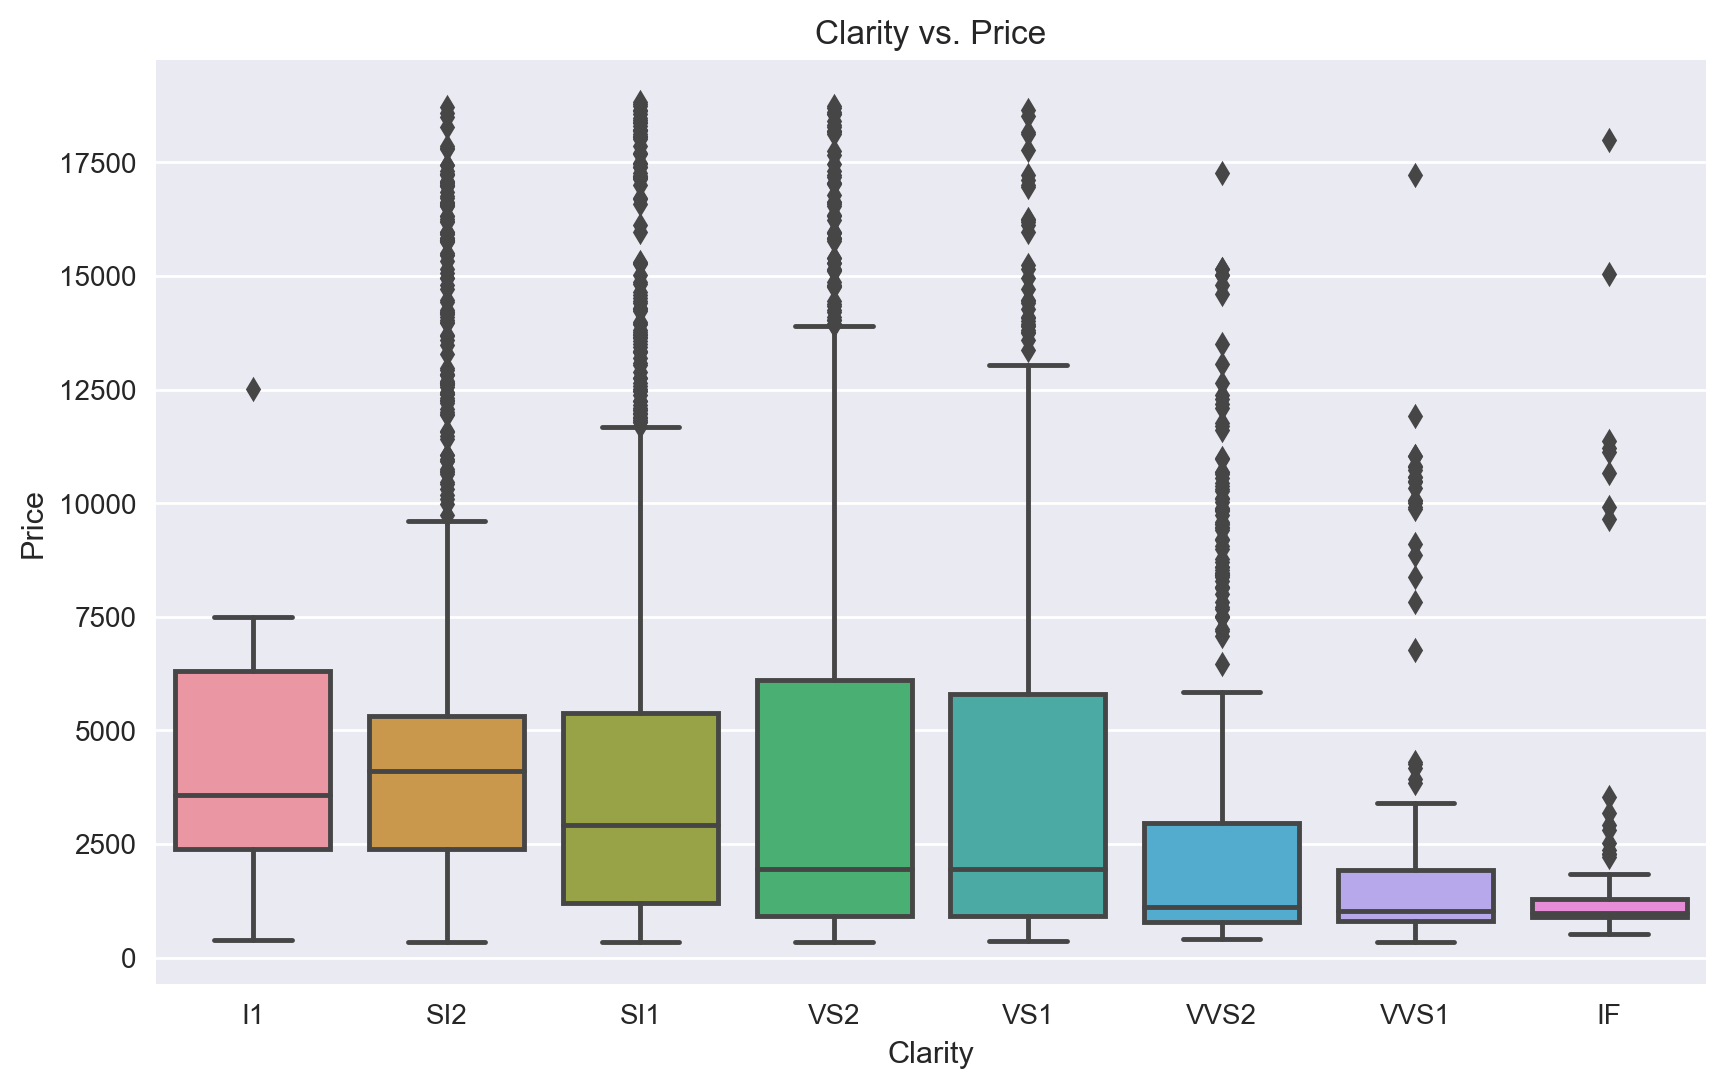

In [127]:
# Clarity vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Clarity vs. Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

## Violinplot

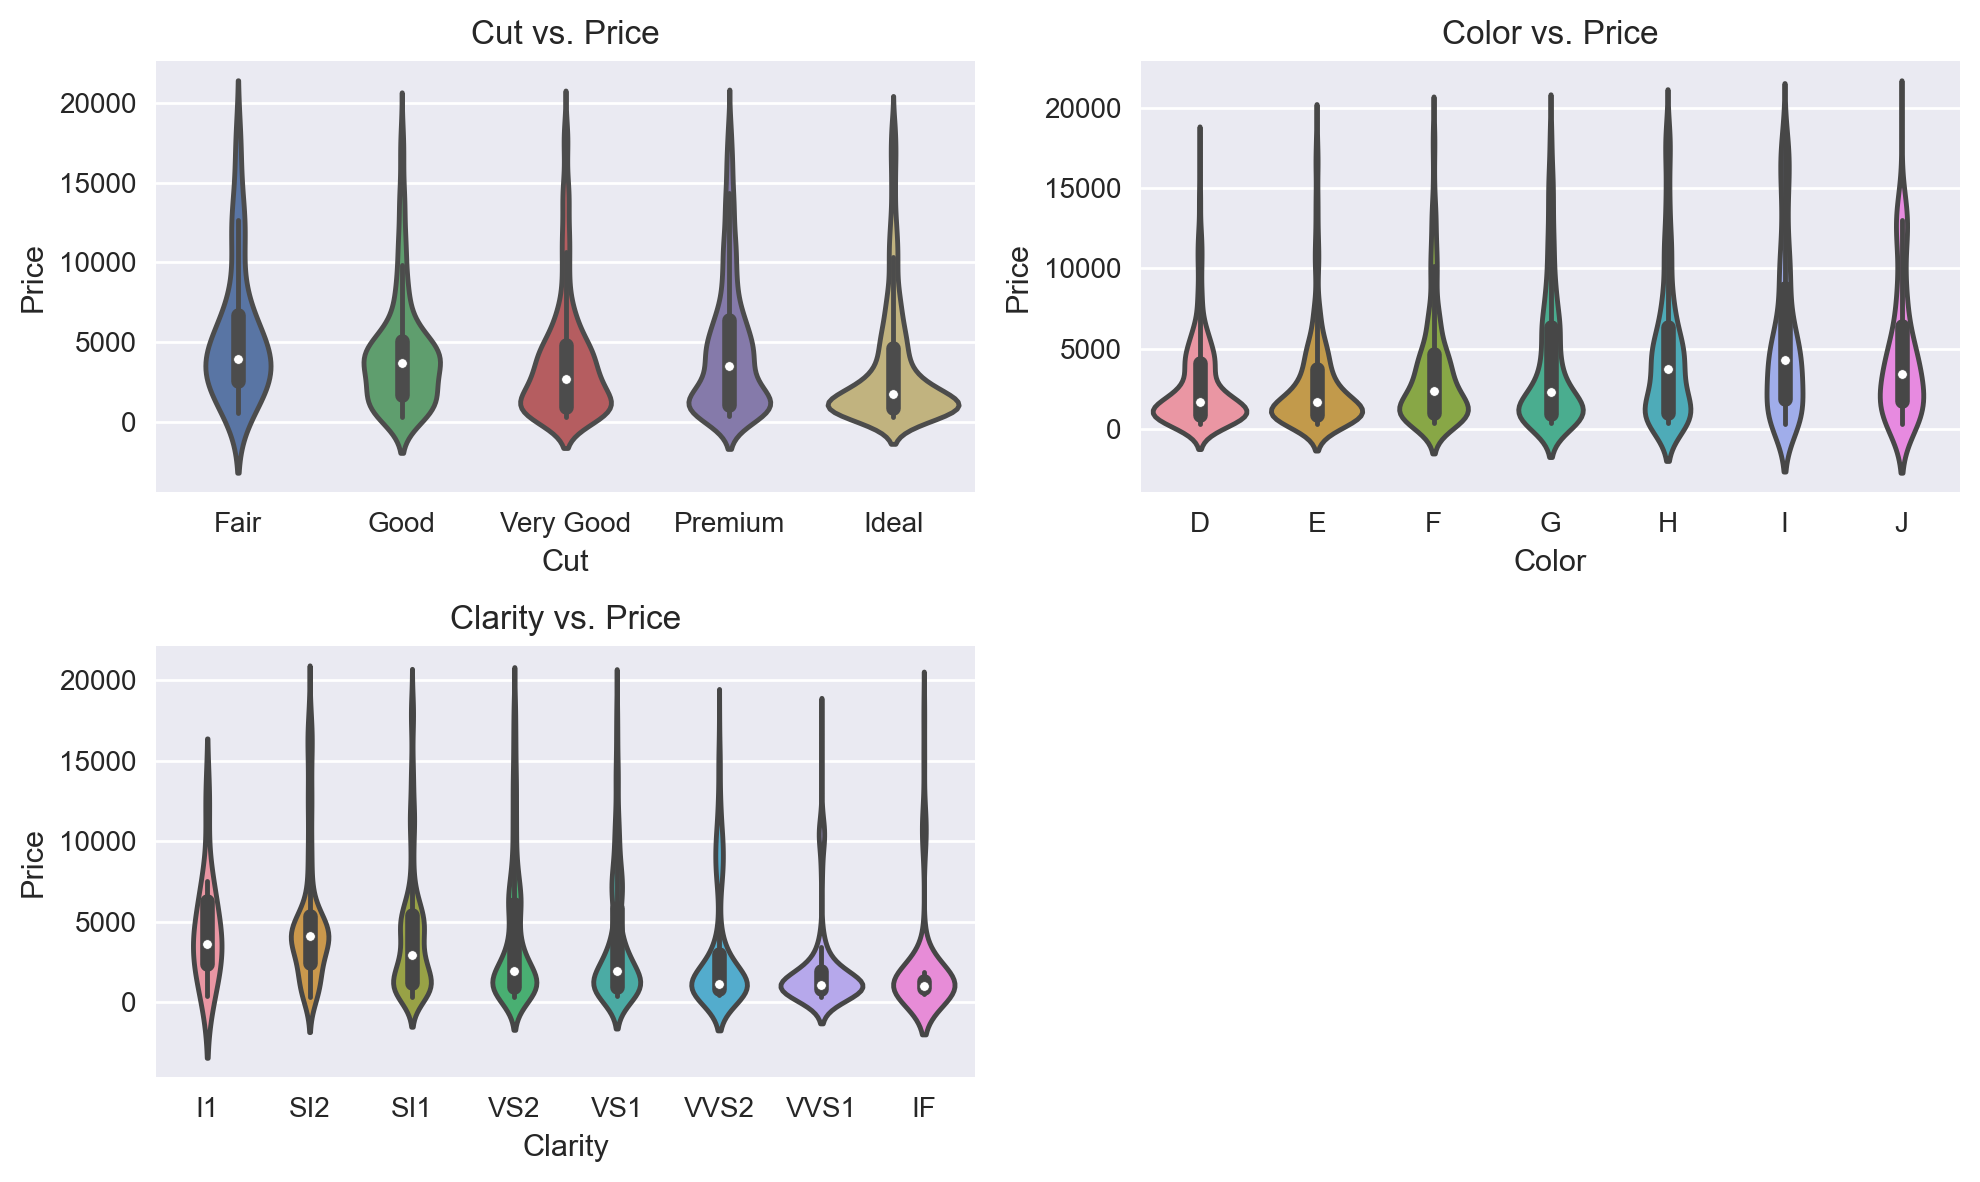

In [128]:

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Cut vs. Price
plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Cut vs. Price')
plt.xlabel('Cut')
plt.ylabel('Price')

# Color vs. Price
plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='color', y='price', order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Color vs. Price')
plt.xlabel('Color')
plt.ylabel('Price')

# Clarity vs. Price
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='clarity', y='price', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Clarity vs. Price')
plt.xlabel('Clarity')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Three-Variable Visualisation

#### scatter plots with color-coded

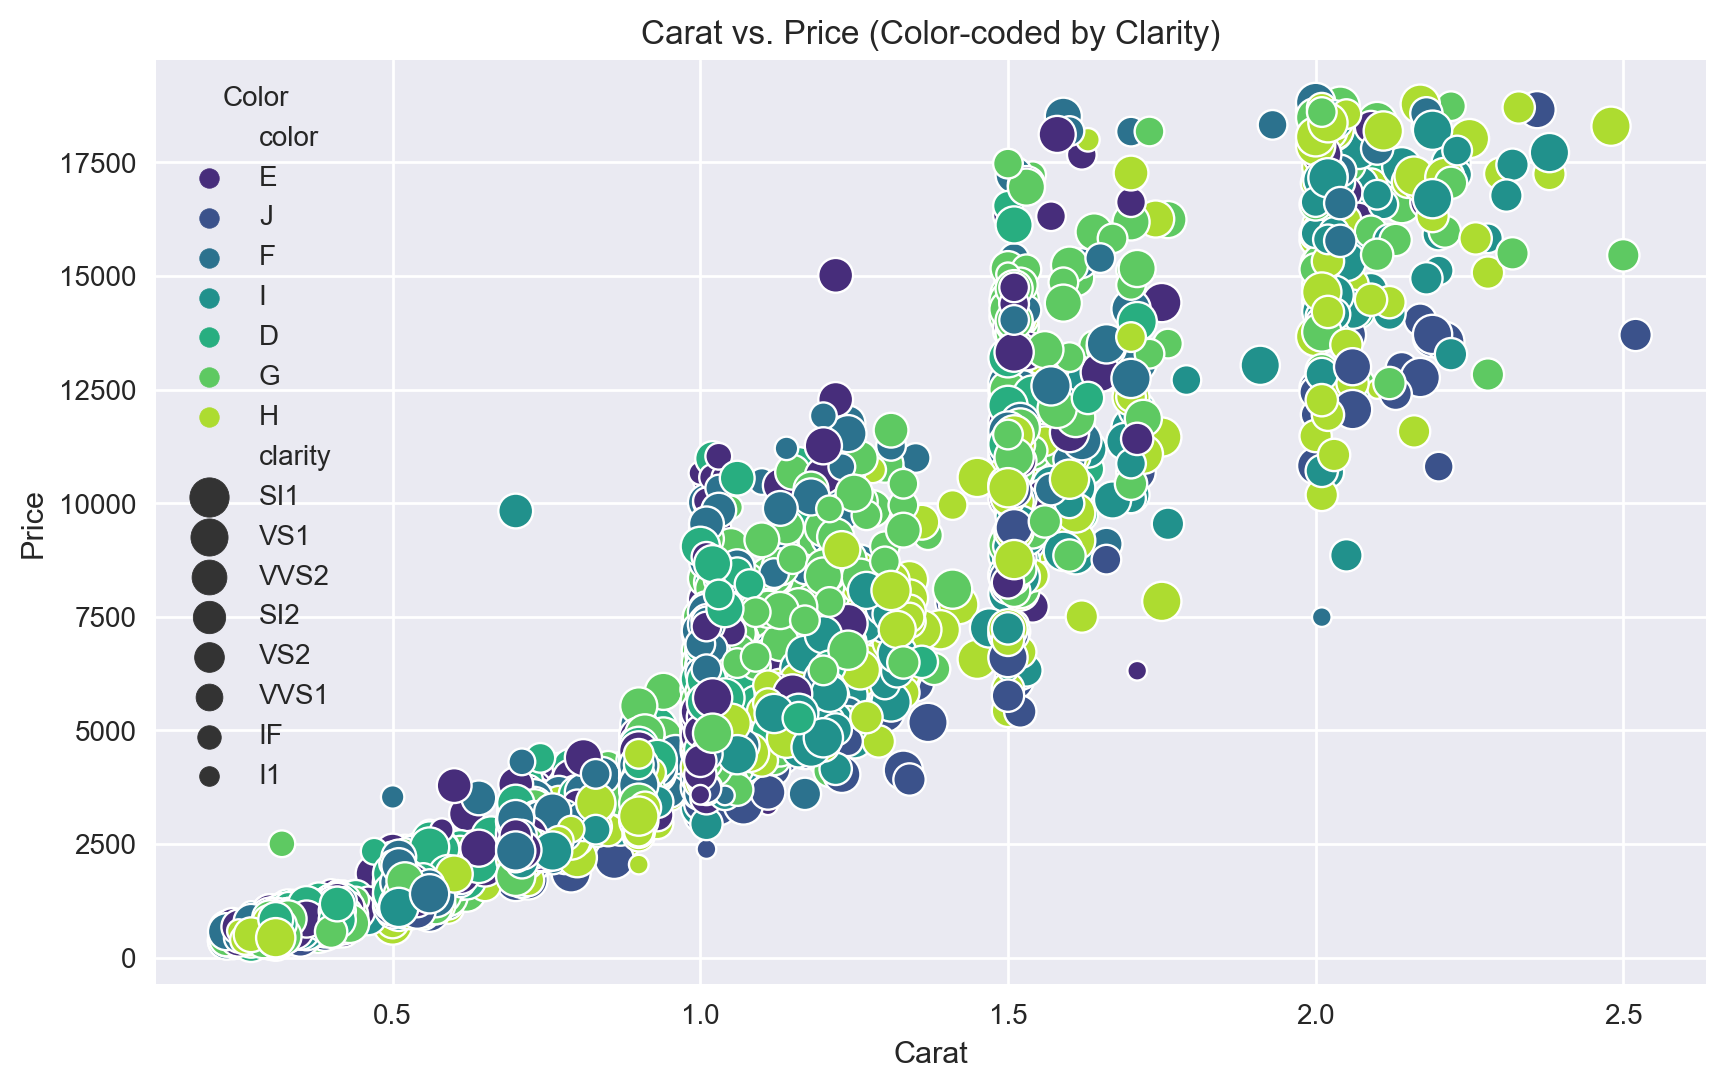

In [130]:
# Scatter plot with color-coded points based on clarity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='color', size='clarity', sizes=(50, 200), palette='viridis')
plt.title('Carat vs. Price (Color-coded by Clarity)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Color')
plt.show()

Diamond price rises with carat weight, and higher clarity diamonds  fetch a premium.

### Facet Grid

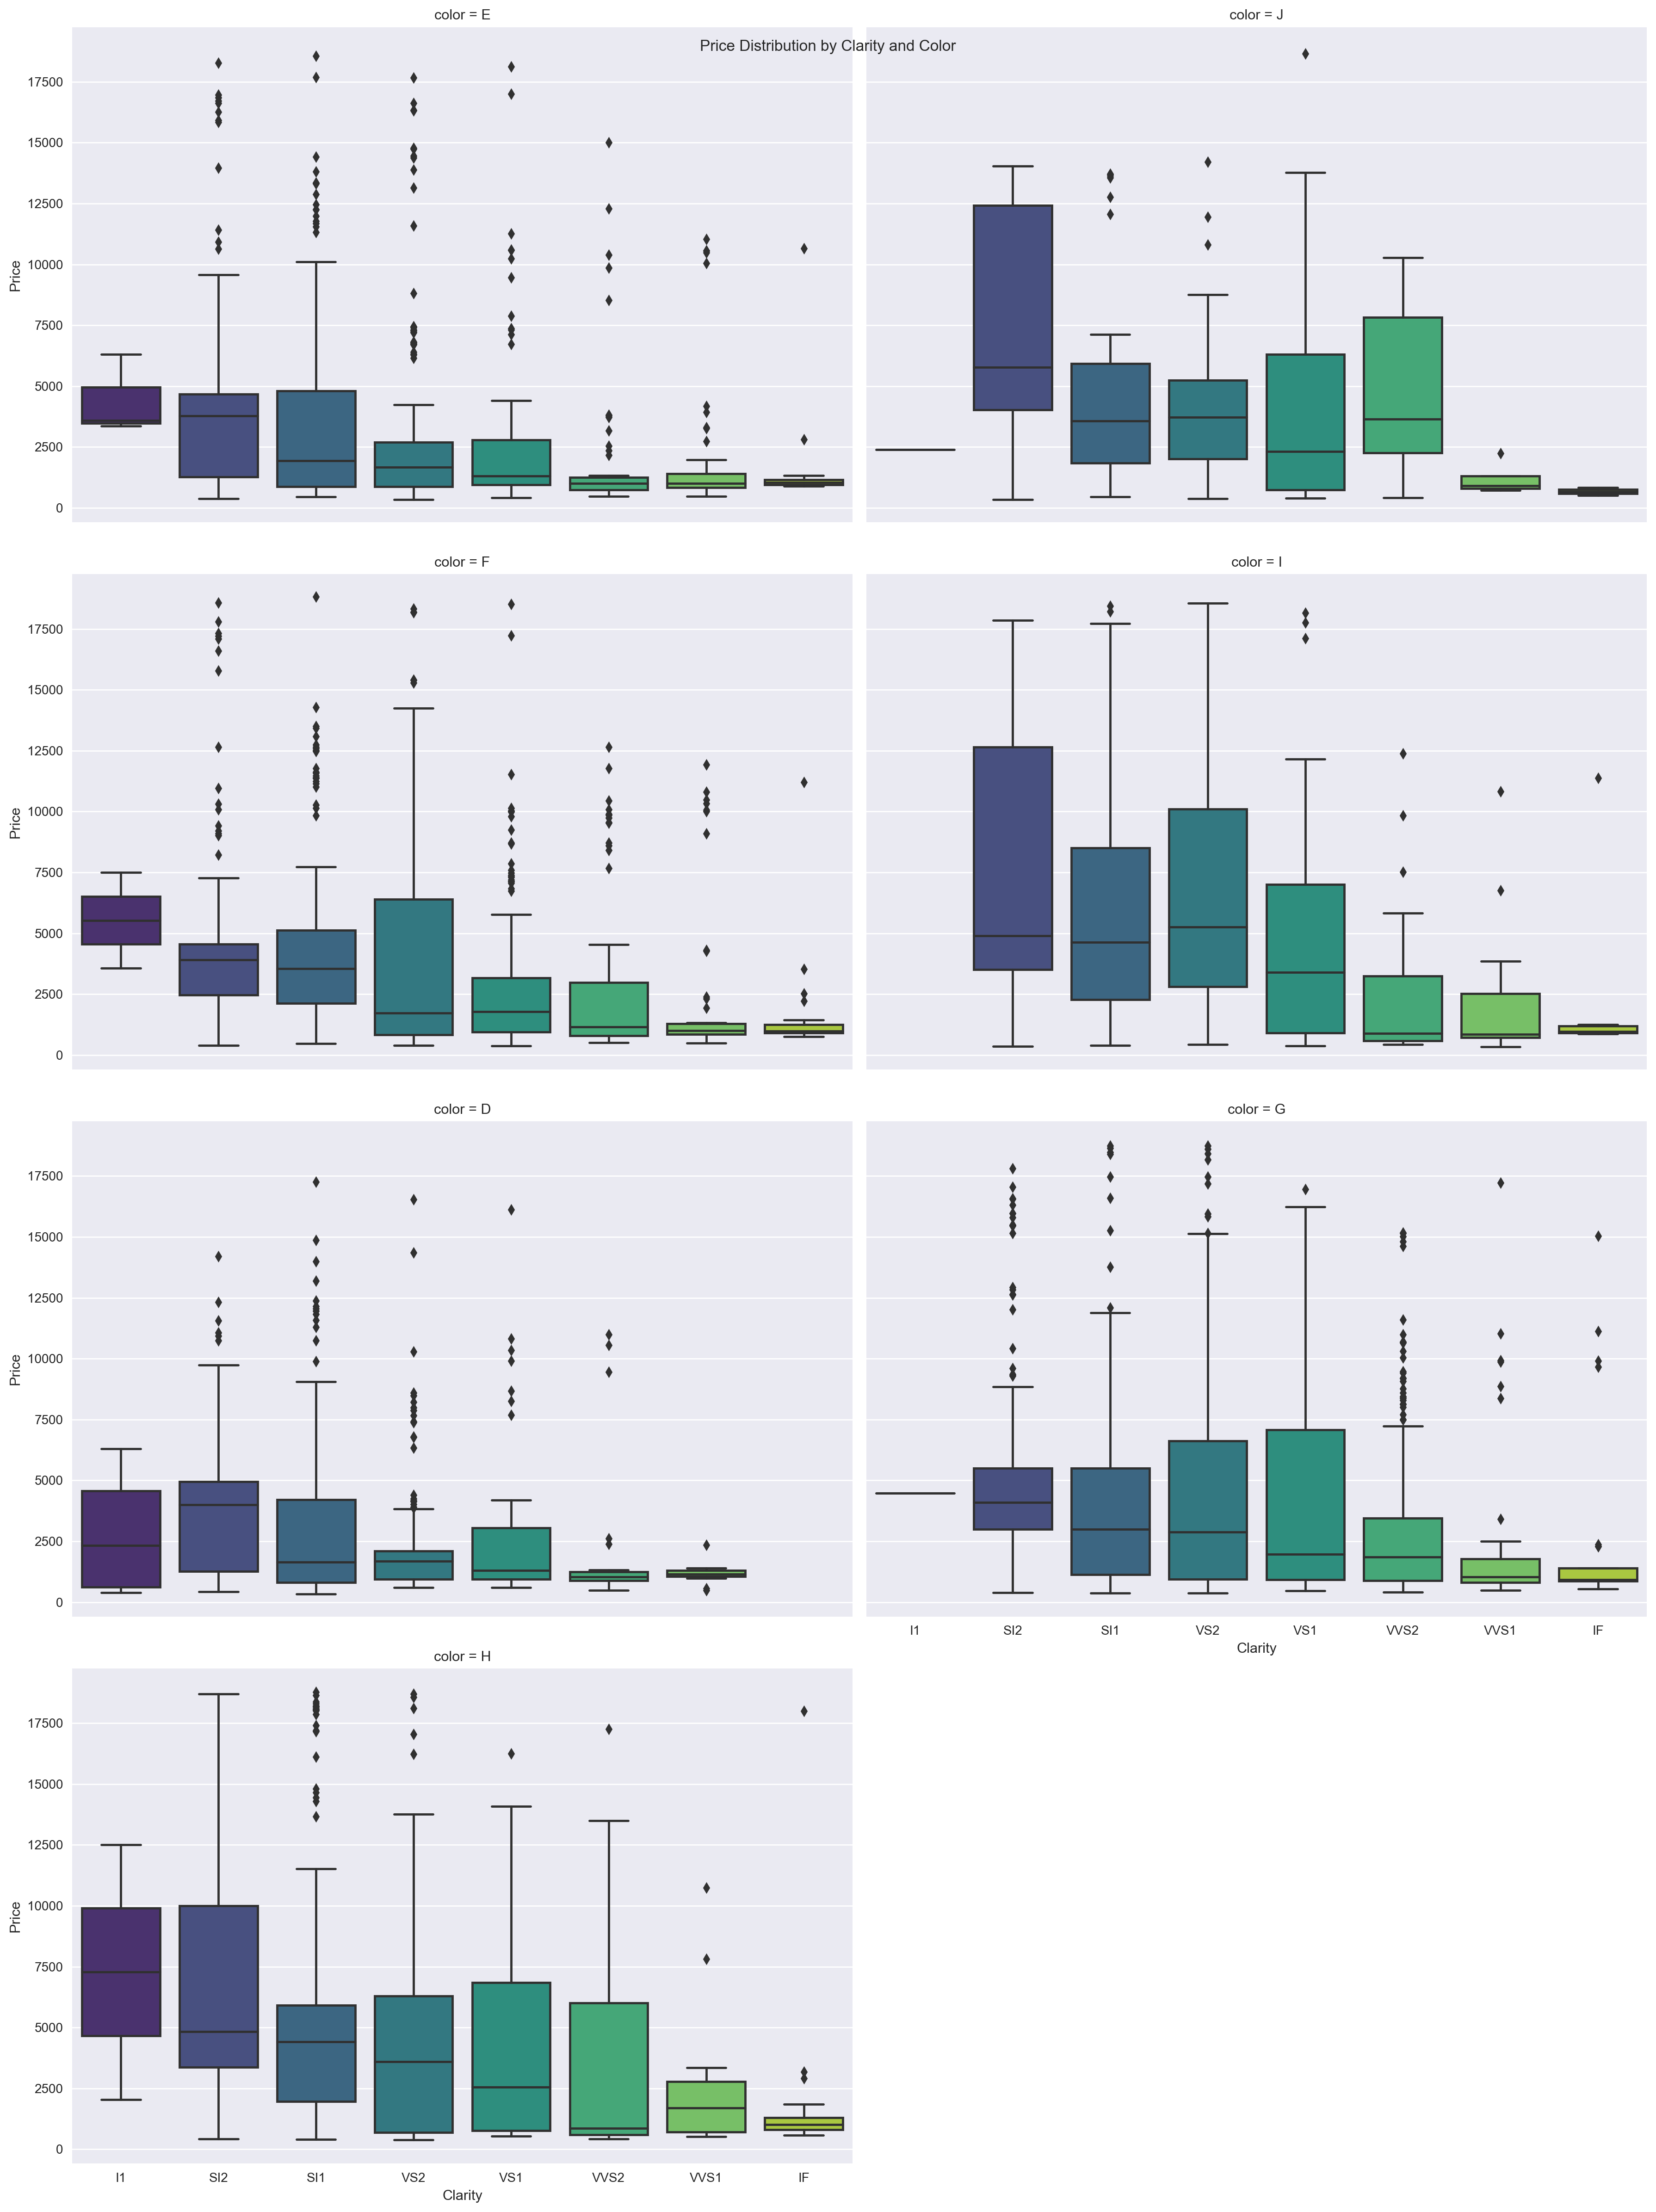

In [162]:
# Facet Grid
g = sns.FacetGrid(df, col='color', col_wrap=2, height=6, aspect=1.5)
g.map(sns.boxplot, 'clarity', 'price', palette='viridis', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
g.set_axis_labels('Clarity', 'Price')
g.fig.suptitle('Price Distribution by Clarity and Color')
plt.show()


### correlation Matrix

<Axes: >

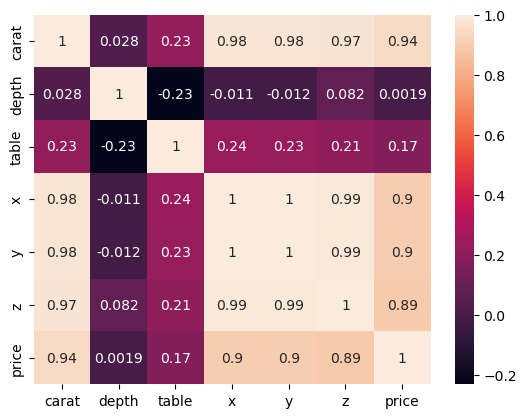

In [43]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

### Scatter Plot Matrix

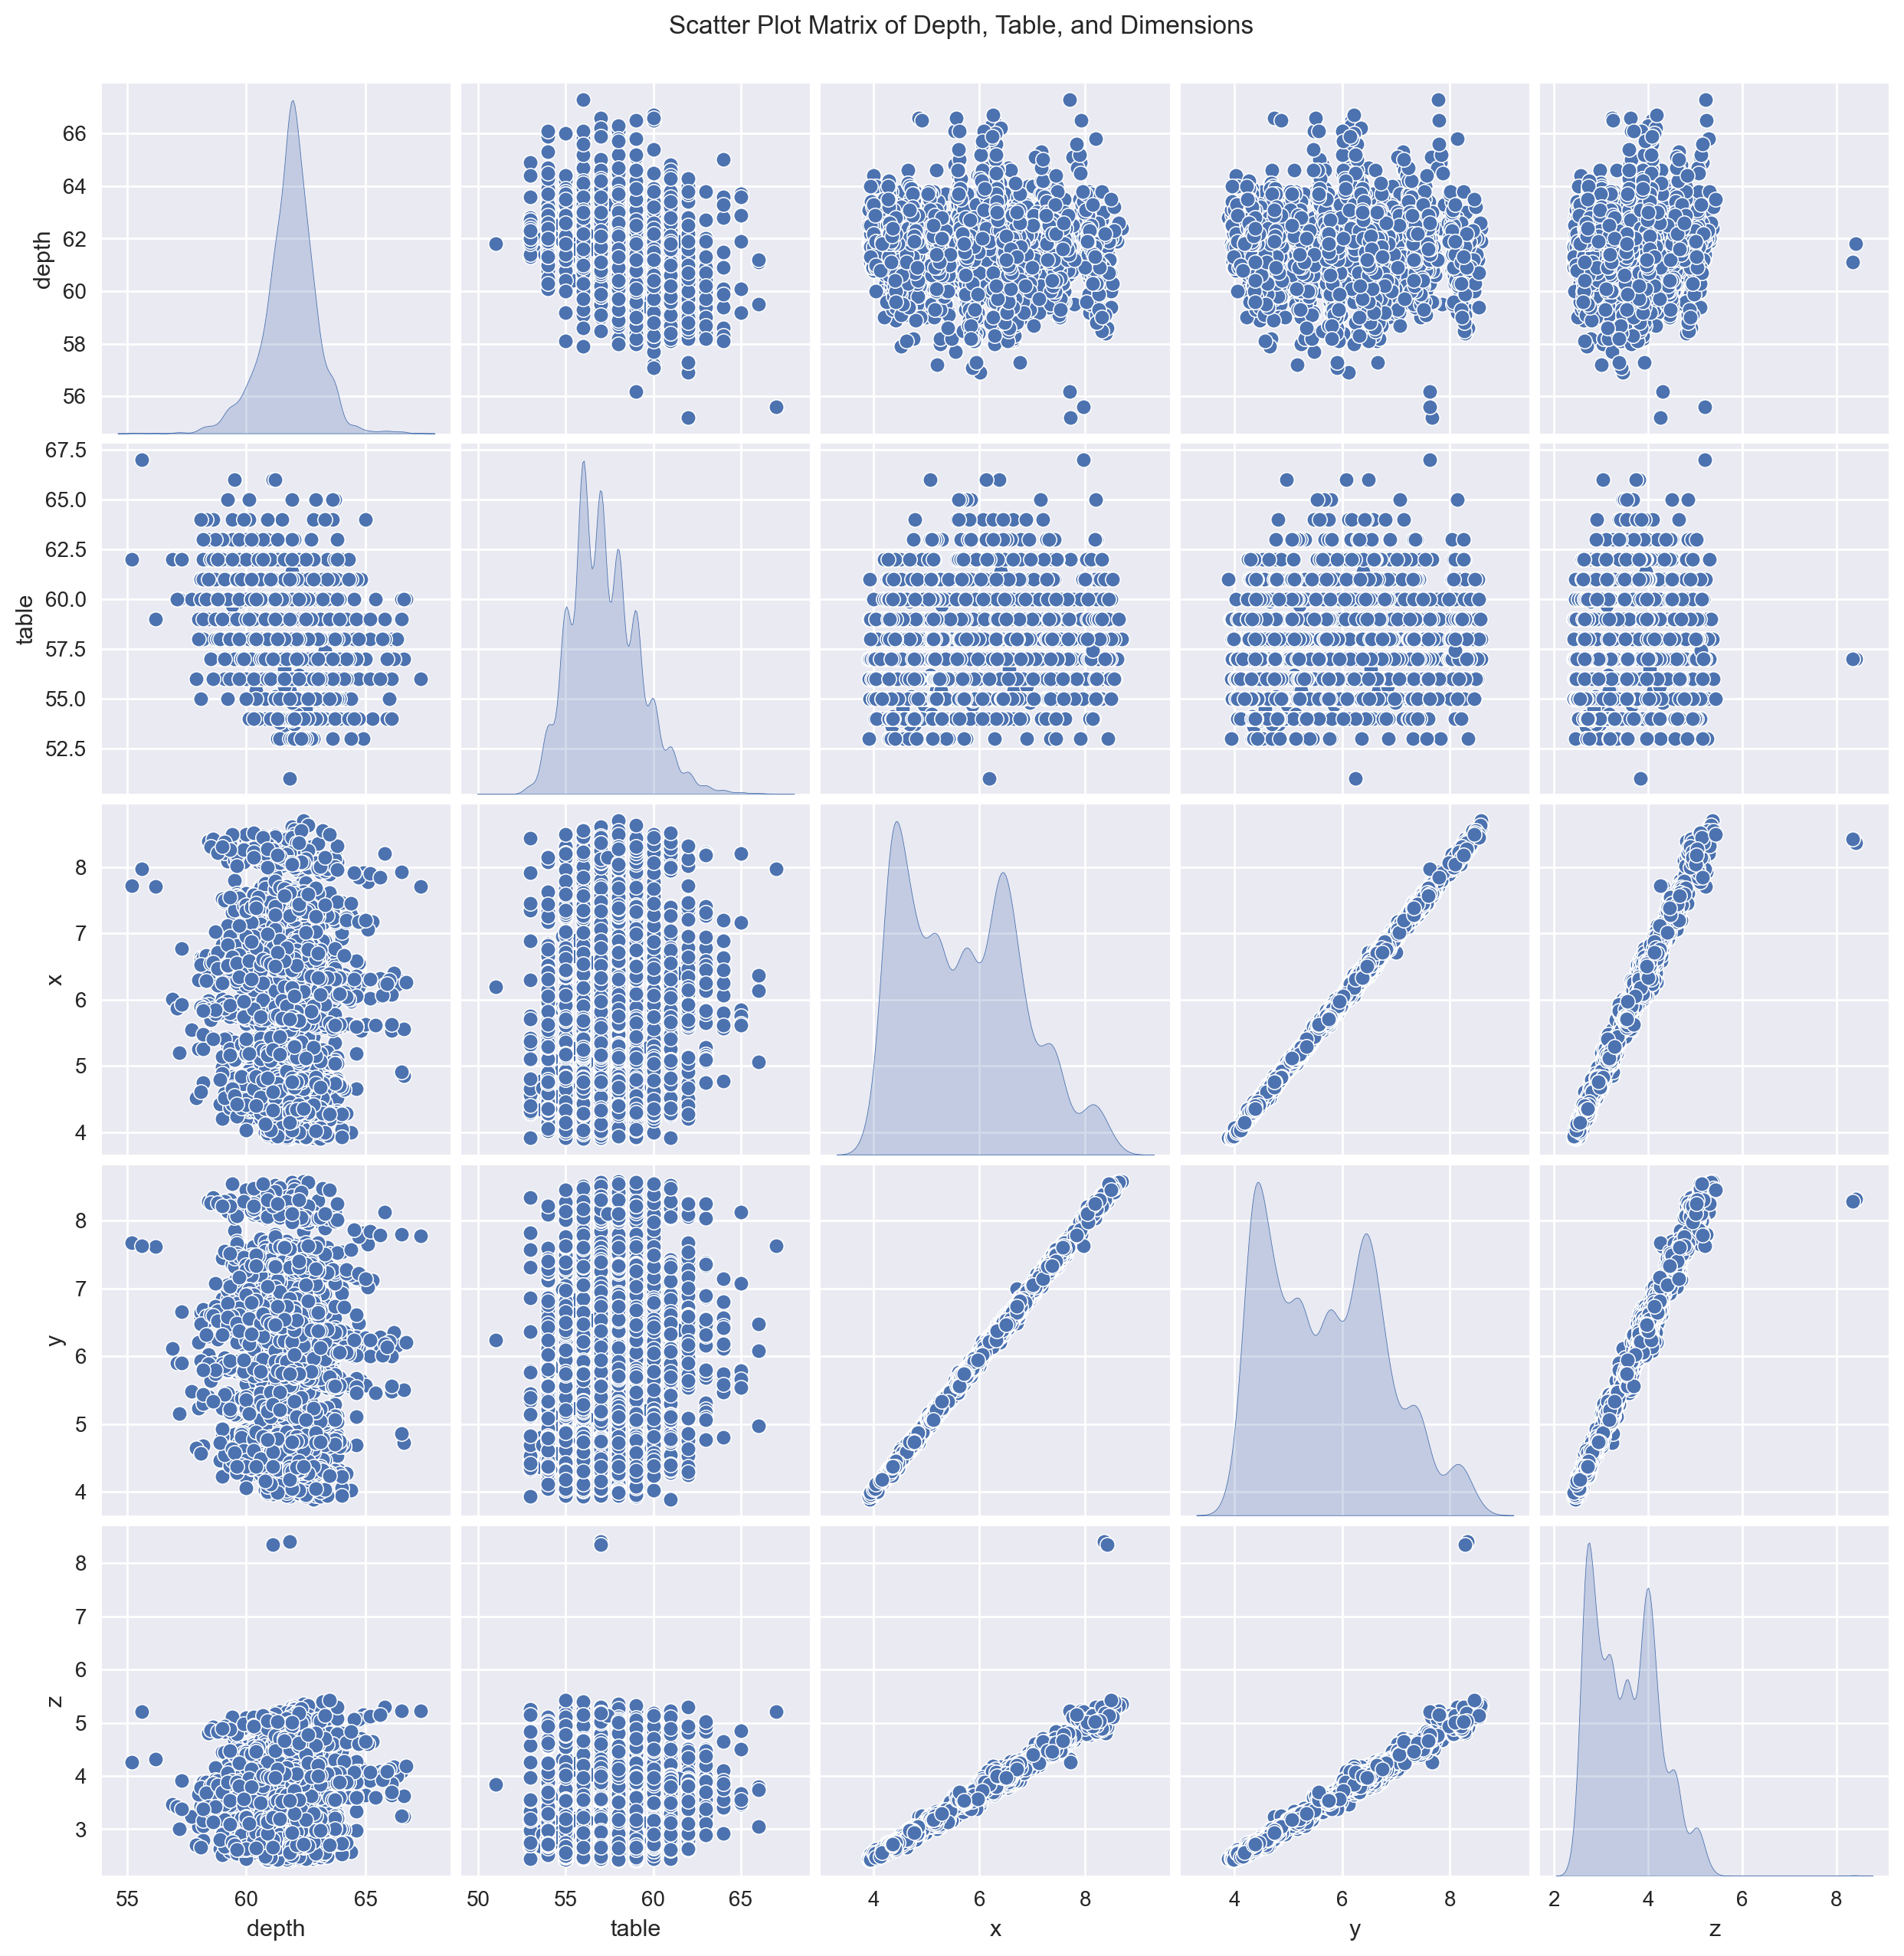

In [163]:
# Scatter Plot Matrix
scatter_matrix = sns.pairplot(df, vars=['depth', 'table', 'x', 'y', 'z'], diag_kind='kde')
scatter_matrix.fig.suptitle('Scatter Plot Matrix of Depth, Table, and Dimensions', y=1.02)
plt.show()

In [45]:
df.head()

carat        cut color clarity  depth  table     x     y     z  price
0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

# Data PreProcessing

In [165]:
## https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [166]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [167]:
df['clarity'].unique()

array(['SI1', 'VS1', 'VVS2', 'SI2', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [168]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [169]:
df['color'].unique()

array(['E', 'J', 'F', 'I', 'D', 'G', 'H'], dtype=object)

In [170]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [171]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [172]:
df.head()

carat  cut  color  clarity  depth  table     x     y     z  price
184046   1.05    5      2        3   61.4   55.0  6.59  6.56  4.04   6937
49070    1.50    2      7        5   60.1   60.0  7.30  7.36  4.41   8359
143111   0.54    3      3        6   62.8   54.0  5.22  5.25  3.29   2362
89111    0.33    5      3        6   61.7   55.0  4.48  4.47  2.76   1041
136184   0.90    4      6        3   62.5   58.0  6.13  6.06  3.81   3220

<function matplotlib.pyplot.show(close=None, block=None)>

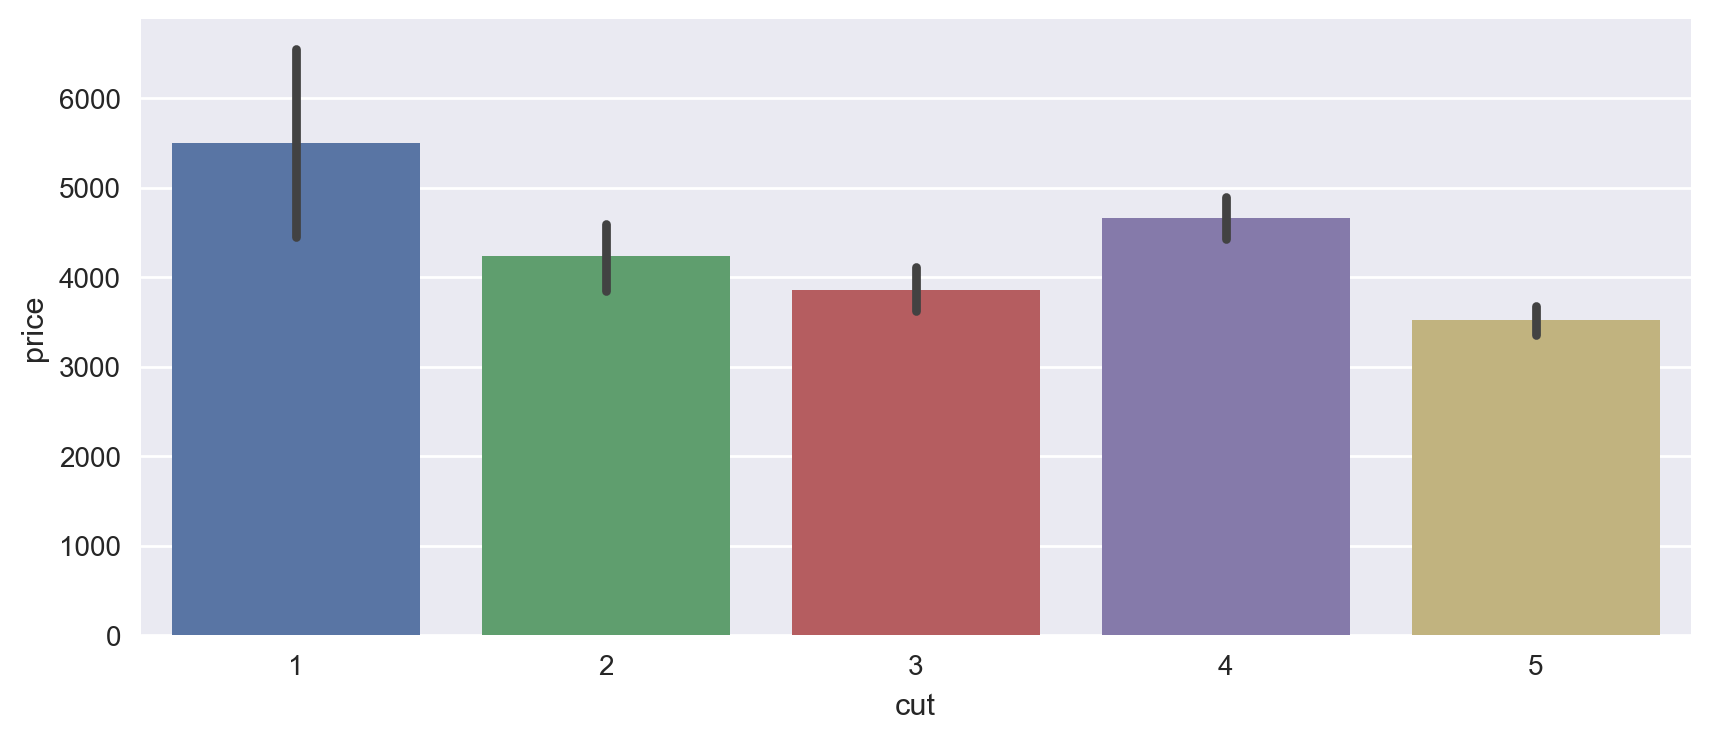

In [173]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='cut')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

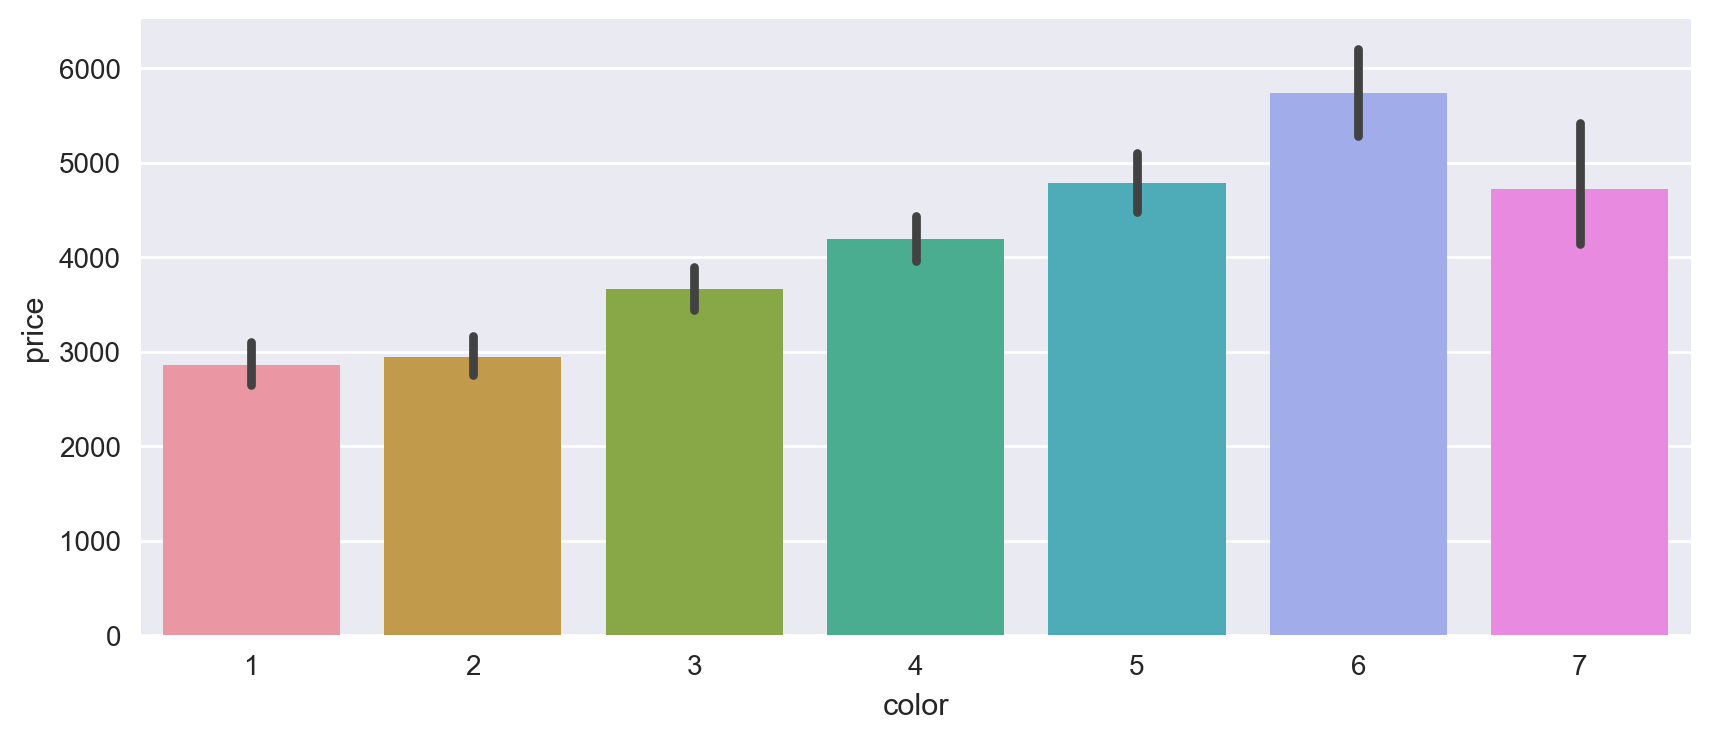

In [174]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='color')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

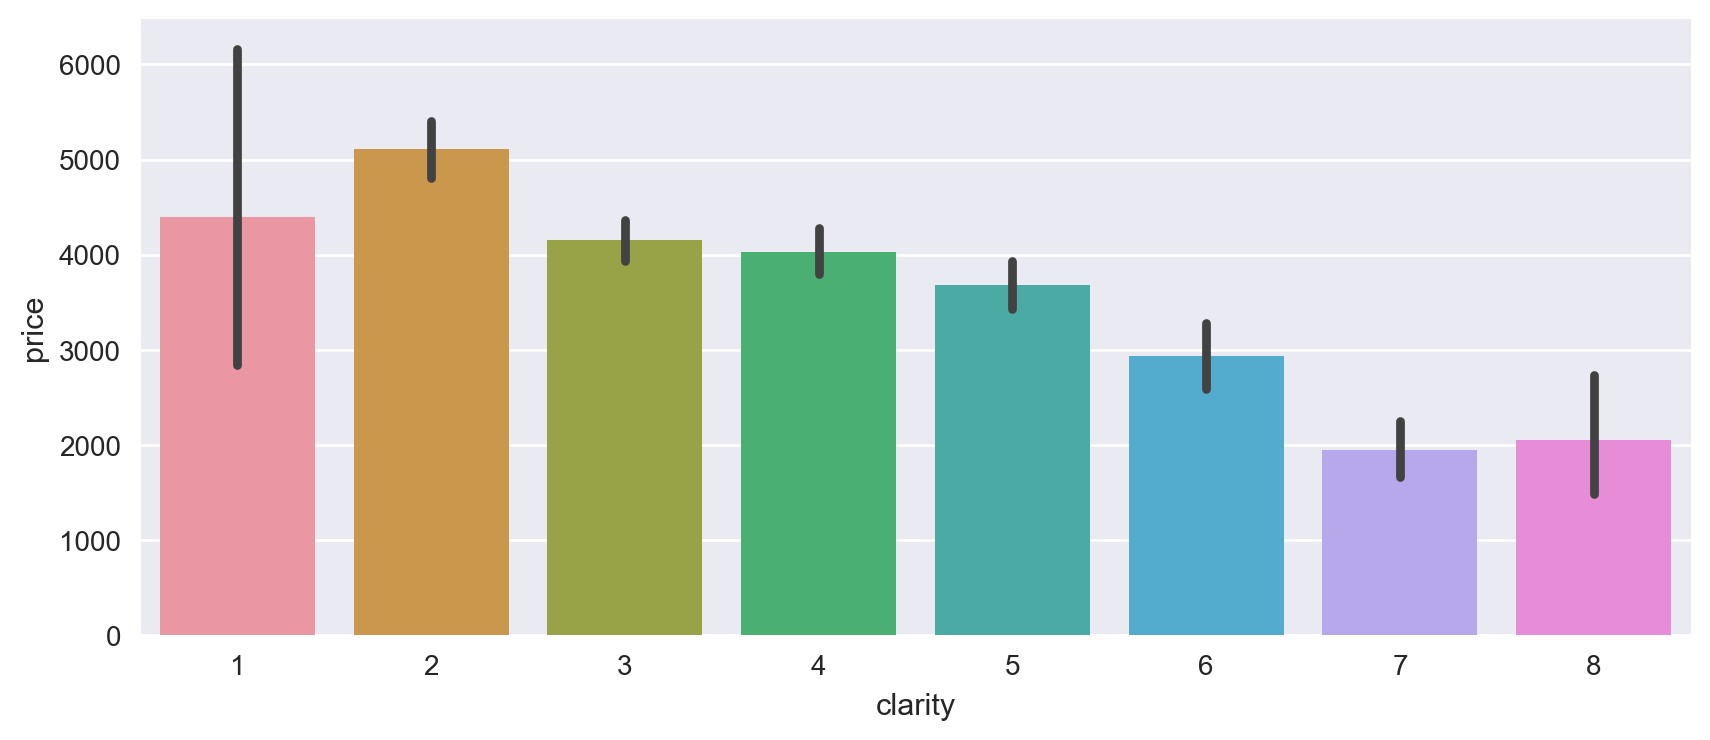

In [175]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='clarity')
plt.show

## Literature Review <a id='Literature-Review'></a>

### Abstract:

Diamonds are rare, alluring and have a lasting appeal to humanity. Over the years, it has become a top gem highly sort after with high demand and prices. Various industries rely on the industry and understanding what affects their price is paramount. Various stakeholders in the diamond industry such as; diamond miners, manufacturers, retailers, investors, and diamond consumers need to understand the intricate factors that affect the price. Technology has brought about the use of machine algorithms which have revolutionized the industry over the years leading to innovative methodologies to accurately predicting diamond prices. This review aims at conducting literature review and getting the latest ideas, methodologies, findings and so forth on diamond price prediction using machine algorithm techniques.

### Review of Literature:

Abstract:
Diamonds are rare, alluring and have a lasting appeal to humanity. Over the years, it has become a top gem highly sort after with high demand and prices. Various industries rely on the industry and understanding what affects their price is paramount. Various stakeholders in the diamond industry such as; diamond miners, manufacturers, retailers, investors, and diamond consumers need to understand the intricate factors that affect the price. Technology has brought about the use of machine algorithms which have revolutionized the industry over the years leading to innovative methodologies to accurately predicting diamond prices. This review aims at conducting literature review and getting the latest ideas, methodologies, findings and so forth on diamond price prediction using machine algorithm techniques.


Caers et al.[1] reached the issue of valuing primary deposits of diamonds, the authors made a profound discovery that the empirical tail was vital and the behavior of extreme values was stochastically determined in statistical analysis. Point 2: Caers relied on extreme value theory as a basis for his research and used a double bootstrap method for determining the mean stone characteristic. Point 3: The results made by the authors concluded that it was important to consider the value if individual owing to size considerations. Layman’s language: The limit distributions deviated extreme values for size and value of diamonds in primary deposits from lognormal. The novelty of the article consists in the fact that the author outlined extreme value theory as a tool for the analysis of extreme diamond variables behavior. It opened up avenues leading to improving current methodologies in evaluating diamond deposits.

As noted by Cardoso et al.[2] , a valuation model for cut diamonds was developed with the accent on the superior prediction performances of neural networks in comparison to the regression trees . The approach involved running regression trees and neural networks to build the valuation model. The neural networks ensured superior predictive performances, explaining 96% of the price variance, while the regression trees were instrumental in feasibility. This study contributed to the development of the techniques of the valuation of diamonds based cuts, emphasizing the superiority at the neural networks in the prediction of the cut diamond’s unit price .


Marmolejos et al.[3]  used information mining methods to are expecting diamond costs, identifying the optimal relevant capabilities effecting diamond pricing. Researchers applied neural networks, linear regression, and M5P regression tree models to predict diamond prices, specializing in figuring out the styles of diamond combos, ascertaining relevant capabilities and their correlations, and studying the effect of multicollinearity on model performance. Thus, the have a look at furnished information into the factors effecting diamond pricing and compared the overall performance of various records mining algorithms in phrases of diamond expenses prediction .

Pandey et al. [4] performed a study on the challenging problem of predicting prices of diamonds. The research of diamond and precious metal prices used ensemble techniques as well as feature selection. The objective of the study was to compare different techniques and evaluate their results to ensure accurate forecasts on the future prices of diamonds and precious metals. This study highlighted the importance of ensemble learning for such complicated tasks and showed that experience is required to make good predictions of the prices .

Alsuraihi et al. [5]  utilized machine learning algorithms in predicting diamond prices; they established that random forest regression was the most effective system. The research deployed diverse machine learning algorithms, such as linear regression, random forest regression, polynomial regression, gradient descent, and neural networks, to predict the prices of diamonds . The random forest regression was the best algorithm in predicting the prices of diamonds after undergoing rigorous training, testing, and analysis. The research contributed to boosting the efficiency of machine learning systems in predicting the prices of diamonds . 

Mihir et al. [6] utilized data mining algorithms in predicting the prices of diamonds, and they presented their papers during the 2nd International Conference on Communication, Computing, and Industry 4.0.The authors compared various machine learning regression algorithms and proved that the CatBoost regression algorithm was optimal for diamond price prediction. Making a comparative analysis, the researchers argued about the high accuracy of CatBoost Regression. For example, “The CatBoost Regression performed the best with MAE of 111.2, MSE of 28036, and RMSE of 167.4” . 

Sharma et al.[7] made a comparative analysis of supervised models for diamond price prediction presented at Confluence. They examined eight supervised models, such as linear regression, decision tree, random forest, and others. After careful data preprocessing and analyzing the correlation between attributes, the researchers concluded that the Random Forest Regression Model showed more accurate results than others.

In their presentation at the International Seminar on Machine Learning, Optimization, and Data Science, they stated that unlike Fitriani et al.[8] , their analysis indicated that the LASSO model produced better accuracy in predicting the prices of diamonds. The model was able to predict diamond prices with an accuracy of 0.9641. However, while both findings are contradictory, this analysis agrees that the k-NN algorithm has a significant weakness that makes it less efficient in predicting diamond prices than LASSO. The only difference is that this review found that k-NN can work well if incorporated into a feature selection technique.

In predicting diamond prices, machine learning algorithms were comprehensively compared by Basysyar et al. [9]. Among their regression models of choice were LASSO Regression, ElasticNet Regression, Random Forest Regression, Ridge Regression, XGBoost, Support Vector Regression, and a stacked ensemble. The news impact factor was found to be significant in the forecasting of diamond prices, as well as the weight of diamonds and their associated dimensions. Interestingly, they found that for diamonds at certain weight thresholds and beyond, the dispersion of prices only increased. Thus, what I have found useful for the purpose of diamond valuation was the finding of these algorithms used for predictive purposes .


Several recent studies have laid the groundwork for the prediction of diamond prices. Ta et al. [10] designed regression models built on the Four Cs to forecast the cost of diamonds, relying on information from the Data and Story Library. The scholars’ predictions turned out to be quite accurate, with their work revealing “the combined effect of these most fundamental attributes on the price of diamonds” and the understanding of the factors defining the pricing of diamonds . In conclusion, it is essential to mention that in such a narrow domain, as the prediction of diamond prices, there are many groundbreaking studies demonstrating substantial progress in the field.

Basha et al.[11] published two research articles on diamond price forecasting, which both considered Random Forest. In the article, “Predicting diamond prices—a machine learning approach,” the authors “performed a comparative analysis and examined various classification models and concluded that Random Forest being the best classifier in forecasting diamond price” . Thus, this study demonstrates that Random Forest is highly effective in this type of forecasting , as evidenced by the outcomes of the research.
In the other article, “Effective estimation of diamond price in the machine learning perspective,” the same methodology was used, and the focus was also on Random Forest. As a result, the researchers found that their method “outperforms other classification methods in forecasting diamond price” . These findings confirm that Random Forest is strongly effective in such classification tasks (Basha et al., 2023)[12].

Swain et al.[13] proposed GemInsight — a machine learning – based solution for diamond grading. By employing the Random Forest model, the authors sought to reach an outstanding 79% accuracy in the forecasting of diamond grading relevant to the key qualitative parameters. The indicated work became an important milestone in the context of the forecasting of the quality of a diamond, as it allowed to automate a range of processes using machine learning tools.


The last article reviewed was by Mankawade et al.[14] , who addressed diamond price prediction using different machine learning algorithms. By considering multiple features and using linear regression, decision trees, and k-nearest neighbors as solutions to be combined, the authors intended to create an optimal solution for diamond price prediction. The study is interesting because it shows that different machine learning techniques must be used to predict diamond prices accurately .


## Summary and Conclusions <a id='Summary-and-Conclusion'></a>:

Predicting the prices of diamonds precisely is a task that has found immense interest for different categories of people, including buyers, sellers, jewelers, and investors. The development of a reliable forecast model will help greatly in the proper functioning and working of the diamond market. This project seeks to establish the possibility of achieving this goal by utilizing the Gemstone Prices dataset. In phase I of the project, we concentrated on data cleaning, preprocessing, and visualization. The first step was to load the data and identify and drop the “id” variable, which is irrelevant for predictive modeling, as shown in code snippet 1 below. . The second step involved cleaning the data with emphasis on the removal of missing values and outliers, which made no significant impact as the dataset required minimal cleaning. Finally, the third step involved simplifying the analysis by sampling .

After the Team’s exploration through visualizations, some meaningful patterns were unveiled in our data. Particularly, we noticed that the diamonds from certain regions, such as with ideal cut quality, tended to have higher price points . Moreover, we observed that the differences in price over years were relatively minor, suggesting that the diamond market appears to be stable . Finally, it is critical to note that some of the features, such as carat weight and clarity, might significantly affect the price. At the same time, we notice that some numerical features are skewed, including the target variable, Price. In such situations, the further analysis will require the usage of scaling or transformation.

Regarding additional insights, first and foremost, it is apparent that most of the cubic zirconia stones in the dataset are less than 1 carat, with 5 being the largest of all stones . Moreover, it is evident that most of them are colorless, and ideal and premium cut stones are most common.However, there are no flawless cubic zirconia stones in the dataset. SI1, VS1, and VS2 are the most frequent clarity grades, therefore the diamonds are generally of a good quality.

This preliminary analysis provides some useful insights in predicting diamond prices. The key predictors are cut quality, carat weight, and clarity. More complex predictions and patterns require further investigation. The next steps in this research will include the use of advanced modeling techniques and relevant statistical analyses in order to develop a final prediction model that will be based on both linear and non-linear factors.

## References <a id='References'></a>:

[1] J. Caers, "Valuation of primary diamond deposits by extreme value statistics," in *Year_of_published:1996*.

[2] M. M. G. S. Cardoso, "A valuation model for cut diamonds," in *International Transactions in Operational Research*, Year_of_published:2005.

[3] J. M. Peña Marmolejos, "Implementing Data Mining Methods to Predict Diamond Prices," Year_of_published:2018.

[4] A. Pandey, "Gold and Diamond Price Prediction Using Enhanced Ensemble Learning," in *International Conference on Contemporary Computing*, Year_of_published:2019.

[5] W. Alsuraihi et al., "Machine Learning Algorithms for Diamond Price Prediction," in *International Conference on Image, Video and Signal Processing*, Year_of_published:2020.

[6] H. Mihir et al., "Diamond Price Prediction using Machine Learning," in *2nd International Conference on Communication, Computing and Industry 4.0*, Year_of_published:2021.

[7] G. Sharma et al., "Comparative Analysis of Supervised Models for Diamond Price Prediction," in *Confluence*, Year_of_published:2021.

[8] S. A. Fitriani et al., "Least Absolute Shrinkage and Selection Operator (LASSO) and k-Nearest Neighbors (k-NN) Algorithm Analysis Based on Feature Selection for Diamond Price Prediction," in *International Seminar on Machine Learning, Optimization, and Data Science (ISMODE)*, Year_of_published:2021.

[9] F. M. Basysyar et al., "Comparison of Machine Learning Algorithms for Predicting Diamond Prices based on Exploratory Data Analysis," in *International Journal of Engineering Applied Sciences and Technology*, Year_of_published:2022.

[10] C. D. C. Ta et al., "Solving Multiple Variable Problems by Regression Models," in *Conference on Research, Innovation and Vision for the Future in Computing & Communication Technologies*, Year_of_published:2022.

[11] M. S. A. Basha et al., "An Efficient Machine Learning Approach: Analysis of Supervised Machine Learning Methods to Forecast the Diamond Price," in *International Conference for Advancement in Technology (ICONAT)*, Year_of_published:2023.

[12] M. S. A. Basha et al., "Exploring Machine Learning Models to Predict the Diamond Price: A Data Mining Utility Using Weka," in *9th International Conference on Advanced Computing and Communication Systems (ICACCS)*, Year_of_published:2023.

[13] D. Swain et al., "GemInsight: Unleashing Random Forest for Diamond Quality Forecasting," in *International Conference on Computing Communication Control and automation*, Year_of_published:2023.

[14] A. A. Mankawade et al., "Diamond Price Prediction Using Machine Learning Algorithms," in *International Journal for Research in Applied Science and Engineering Technology*, Year_of_published:2023.

[15]Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)